# Cleaning and preparing the data

# Importing data Intentional homicides (per 100,000 people) from World Bank

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data1=pd.ExcelFile('Intentional_homicides(per 1000000 people).xls')
#print(data1.sheet_names)

In [2]:
df1=data1.parse('Data',header=2)
df1=df1.drop(df1.loc[:,'Indicator Name':'2000'],axis=1)
df1=df1.drop(df1.loc[:,'2016':],axis=1)
Intentional_homicides_wb=df1.set_index('Country Name')

In [3]:
#Intentional_homicides_wb.info()
#Intentional_homicides_wb.head()
# We can observe the countries we have in the dataframe by calling index.values
#Intentional_homicides_wb.index.values

# Drug related crime by 100000 people UNODC

In [4]:
drugs=pd.ExcelFile('Drug_related_crimes.xls')
#print(drugs.sheet_names)
drugs=drugs.parse('Data - Total drug related crime',header=(9))
drugs=drugs.reset_index()
drugs=drugs.set_index('Country/territory')
#drugs.head()
drugs=drugs.drop(drugs.iloc[:,:4],axis=1)
drugs=drugs.drop(drugs.iloc[:,0:6],axis=1)
drugs=drugs.drop(drugs.iloc[:,6:],axis=1)
drugs.columns=['2003','2004','2005','2006','2007','2008']
#drugs.head()
#drugs.index.values
#This dataset will not be used because there is no information for all the countries we want to work with

# Importing data for School enrollment, primary (% gross)

In [5]:
data2=pd.ExcelFile('primary_enrollment.xls')
#print(data2.sheet_names)

In [6]:
df2=data2.parse('Data',header=2)
df2=df2.drop(df2.loc[:,'Indicator Name':'2000'],axis=1)
enrollment_primary=df2.drop(df2.loc[:,'2016':],axis=1)
enrollment_primary=enrollment_primary.set_index('Country Name')
#enrollment_primary.info()
#enrollment_primary.describe()

# Importing data for School enrollment, secundary (% gross)

In [7]:
data3=pd.ExcelFile('secundary_enrollment.xls')
#print(data3.sheet_names)

In [8]:
df3=data3.parse('Data',header=2)
df3=df3.drop(df3.loc[:,'Indicator Name':'2000'],axis=1)
enrollment_secundary=df3.drop(df3.loc[:,'2016':],axis=1)
enrollment_secundary=enrollment_secundary.set_index('Country Name')
#enrollment_secundary.info()
#enrollment_secundary.describe()

# Importing data for School enrollment, tertiary (% gross)

In [9]:
data4=pd.ExcelFile('tertiary_enrollment.xls')
#print(data4.sheet_names)

In [10]:
df4=data4.parse('Data',header=2)
df4=df4.drop(df4.loc[:,'Indicator Name':'1999'],axis=1)
enrollment_tertiary=df4.drop(df4.loc[:,'2017':],axis=1)
enrollment_tertiary=enrollment_tertiary.set_index('Country Name')
#enrollment_tertiary.info()
#enrollment_tertiary.describe()

In [11]:
# As we can see, for enrollment primary we have the less missing values so we chose to work with that dataframe for enrollment

# Quality of education system scale(1-7) HumanProgress

In [12]:
edquality=pd.read_csv('Quality education system.csv',header=None)
edquality=pd.pivot_table(edquality, values=2, index=0, columns=1)
edquality=edquality.drop(2016,axis=1)
#edquality.head()
#edquality.index.values

In [13]:
#we have to match the index values names
edquality=edquality.rename({'Hong Kong': 'Hong Kong SAR, China','Yemen':'Yemen, Rep.','Cape Verde':'Cabo Verde','Venezuela':'Venezuela, RB','Russia':'Russian Federation'})
#Intentional_homicides_wb.index.values

In [14]:
edquality=pd.concat([edquality,Intentional_homicides_wb],axis=1,join_axes=[edquality.index])
edquality=edquality.drop(edquality.iloc[:,10:],axis=1)
#edquality.columns.values

In [15]:
#edquality=edquality.reset_index()
#edquality=edquality.set_index('Country Code')
#edquality

In [16]:
edquality=edquality.loc[['Chile','Bolivia', 'Uruguay','Brazil', 'Colombia','Venezuela, RB','Argentina','Peru','Nicaragua',  'Costa Rica','El Salvador','Honduras','Guatemala','Panama','Mexico', 'Canada', 'United States'],:]
#edquality
# Quality of education is an indicator constructed out of the indicator from the World Bank data so we decided it was best to focus on enrollment and PISA scores.

# Dividing by continent

In [17]:
# Now lets see how many countries we have per continent
df=data1.parse('Metadata - Countries')
continent=df.drop('SpecialNotes',axis=1)
continent=continent.set_index('Region')
continent=continent.drop(['East Asia & Pacific','Europe & Central Asia','Middle East & North Africa','South Asia','Sub-Saharan Africa'])
continent.groupby('Region').count()
#continent
# By dividing by continent we could better observe how many countries we had by region and therfore make a better selection of the countries to work with. 

,Country Code,IncomeGroup,TableName
Region,,,
Latin America & Caribbean,42,42,42
North America,3,3,3


In [18]:
#continent.loc['Latin America & Caribbean']
#continent.loc['North America']

In [19]:
continent=continent.reset_index()
continent=continent.set_index('TableName')
# The region division from the world bank was not the prefered one for the work so we manually can change it to the one we prefer once we have a glance of the general distribution 

In [20]:
continent.loc['Mexico','Region']='North America'
continent=continent.drop('Bermuda',axis=0)

In [21]:
continent.loc['Costa Rica','Region']='Central America'
continent.loc['Nicaragua','Region']='Central America'
continent.loc['El Salvador','Region']='Central America'
continent.loc['Honduras','Region']='Central America'
continent.loc['Guatemala','Region']='Central America'
continent.loc['Panama','Region']='Central America'

In [22]:
continent.loc['Uruguay','Region']='South America'
continent.loc['Chile','Region']='South America'
continent.loc['Bolivia','Region']='South America'
continent.loc['Brazil','Region']='South America'
continent.loc['Colombia','Region']='South America'
continent.loc['Venezuela, RB','Region']='South America'
continent.loc['Argentina','Region']='South America'
continent.loc['Peru','Region']='South America'

In [23]:
# Now that we have the countries that we want to work with let's clean the other dataframes
Intentional_homicides_wb=Intentional_homicides_wb.loc[['Chile','Bolivia', 'Uruguay','Brazil', 'Colombia','Venezuela, RB','Argentina','Peru','Nicaragua',  'Costa Rica','El Salvador','Honduras','Guatemala','Panama','Mexico', 'Canada', 'United States'],:]
enrollment_primary=enrollment_primary.loc[['Chile','Bolivia', 'Uruguay','Brazil', 'Colombia','Venezuela, RB','Argentina','Peru','Nicaragua',  'Costa Rica','El Salvador','Honduras','Guatemala','Panama','Mexico', 'Canada', 'United States'],:]
enrollment_secundary=enrollment_secundary.loc[['Chile','Bolivia', 'Uruguay','Brazil', 'Colombia','Venezuela, RB','Argentina','Peru','Nicaragua',  'Costa Rica','El Salvador','Honduras','Guatemala','Panama','Mexico', 'Canada', 'United States'],:]
enrollment_tertiary=enrollment_tertiary.loc[['Chile','Bolivia', 'Uruguay','Brazil', 'Colombia','Venezuela, RB','Argentina','Peru','Nicaragua',  'Costa Rica','El Salvador','Honduras','Guatemala','Panama','Mexico', 'Canada', 'United States'],:]
#edquality=edquality.loc[['Chile','Bolivia', 'Uruguay','Brazil', 'Colombia','Venezuela, RB','Argentina','Peru','Nicaragua',  'Costa Rica','El Salvador','Honduras','Guatemala','Panama','Mexico', 'Canada', 'United States'],:]

In [24]:
#Intentional_homicides_wb
#enrollment_primary
#enrollment_secundary
#enrollment_tertiary
#There are a lot of missing values for enrollment tertiary

In [25]:
continent=continent.reset_index()
continent=continent.set_index('Country Code')
Intentional_homicides_wb=Intentional_homicides_wb.reset_index()
Intentional_homicides_wb=Intentional_homicides_wb.set_index('Country Code')
enrollment_primary=enrollment_primary.reset_index()
enrollment_primary=enrollment_primary.set_index('Country Code')
enrollment_secundary=enrollment_secundary.reset_index()
enrollment_secundary=enrollment_secundary.set_index('Country Code')

In [26]:
enrollment_primary=pd.concat([enrollment_primary, continent], axis=1, join_axes=[enrollment_primary.index])
enrollment_secundary=pd.concat([enrollment_secundary, continent], axis=1, join_axes=[enrollment_secundary.index])
Intentional_homicides_wb=pd.concat([Intentional_homicides_wb, continent], axis=1, join_axes=[Intentional_homicides_wb.index])
#edquality=pd.concat([edquality,continent],axis=1,join_axes=[edquality.index])

In [27]:
#enrollment_primary.head()
#enrollment_secundary.head()
#Intentional_homicides_wb.head()
#edquality.head()
#Intentional_homicides_wb.groupby(by=['Region','IncomeGroup']).count()

In [28]:
Intentional_homicides_wb=Intentional_homicides_wb.drop('TableName',axis=1)
Intentional_homicides_wb=Intentional_homicides_wb.reset_index()
Intentional_homicides_wb=Intentional_homicides_wb.set_index('Region')
enrollment_primary=enrollment_primary.drop('TableName',axis=1)
enrollment_primary=enrollment_primary.reset_index()
enrollment_primary=enrollment_primary.set_index('Region')
enrollment_secundary=enrollment_secundary.drop('TableName',axis=1)
enrollment_secundary=enrollment_secundary.reset_index()
enrollment_secundary=enrollment_secundary.set_index('Region')
#edquality=edquality.drop('TableName',axis=1)
#edquality=edquality.reset_index()
#edquality=edquality.set_index('Region')

In [29]:
#enrollment_primary.columns.values
#enrollment_secundary.head()
#Intentional_homicides_wb.columns.values
#edquality.head()
#Intentional_homicides_wb.groupby(by=['Region','IncomeGroup']).count()

# Plotting

In [30]:
# Making a plot of enrollment and homicides separately gives us a hint on what we can expect and help us decide how to work.

# Creating a function to make a plot for each dataframe by region
def result_region(region):

    enrollment_primary1=enrollment_primary.loc[region]
    enrollment_primary1=enrollment_primary1.reset_index()
    enrollment_primary1=enrollment_primary1.drop(['Region','IncomeGroup'],axis=1)
    enrollment_primary1=enrollment_primary1.set_index('Country Name').sort_index()
    enrollment_primary1.loc[:,'2001':].T.plot(marker='*')
    plt.ylabel('Gross enrollment ratio %',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.title('Primary Gross enrollment ratio % by year in '+str(region),fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],['2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014', '2015'], rotation='vertical') 
    fig_size = plt.rcParams["figure.figsize"]
    #print(fig_size) #[6.0,4.0]
    fig_size[0] = 12
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()
    
    enrollment_secundary1=enrollment_secundary.loc[region]
    enrollment_secundary1=enrollment_secundary1.reset_index()
    enrollment_secundary1=enrollment_secundary1.drop(['Region','IncomeGroup'],axis=1)
    enrollment_secundary1=enrollment_secundary1.set_index('Country Name').sort_index()
    enrollment_secundary1.loc[:,'2001':].T.plot(marker='*')
    plt.ylabel('Gross enrollment ratio %',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.title('Secundary Gross enrollment ratio % by year in '+str(region),fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],['2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014', '2015'], rotation='vertical') 
    fig_size = plt.rcParams["figure.figsize"]
    #print(fig_size) #[6.0,4.0]
    fig_size[0] = 12
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()
    
    homicides1=Intentional_homicides_wb.loc[region]
    homicides1=homicides1.reset_index()
    homicides1=homicides1.drop(['Region','IncomeGroup'],axis=1)
    homicides1= homicides1.set_index('Country Name').sort_index()
    homicides1.loc[:,'2001':].T.plot(marker='*')
    plt.ylabel('Homicides by 1000000 people',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.title('Intentional homicides by 1 000 000 people by year in '+str(region),fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    fig_size = plt.rcParams["figure.figsize"]
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],['2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014', '2015'], rotation='vertical') 
    #print(fig_size) #[6.0,4.0]
    fig_size[0] = 12
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()

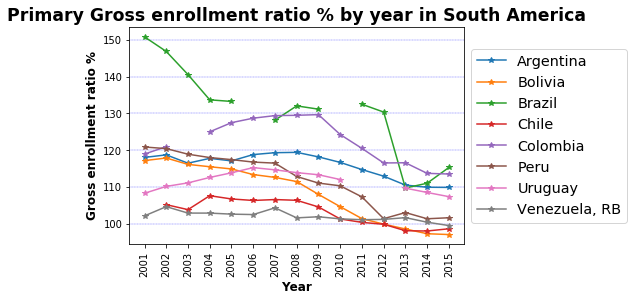

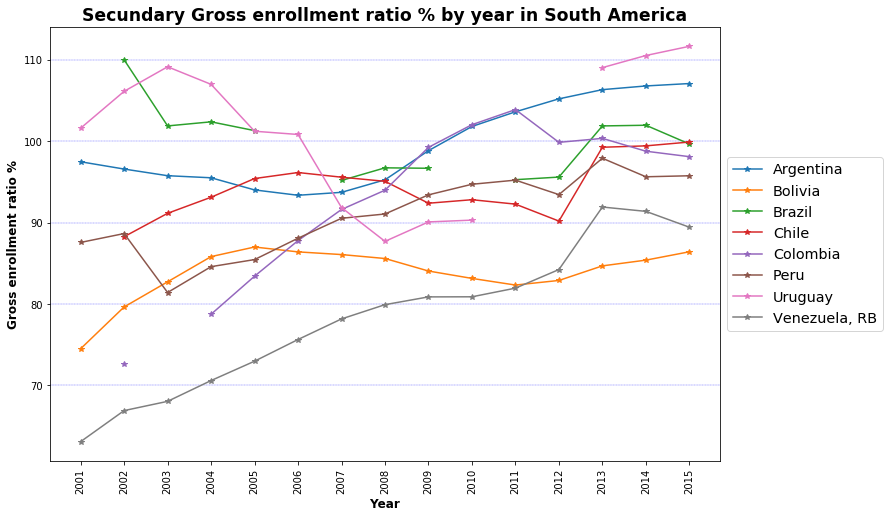

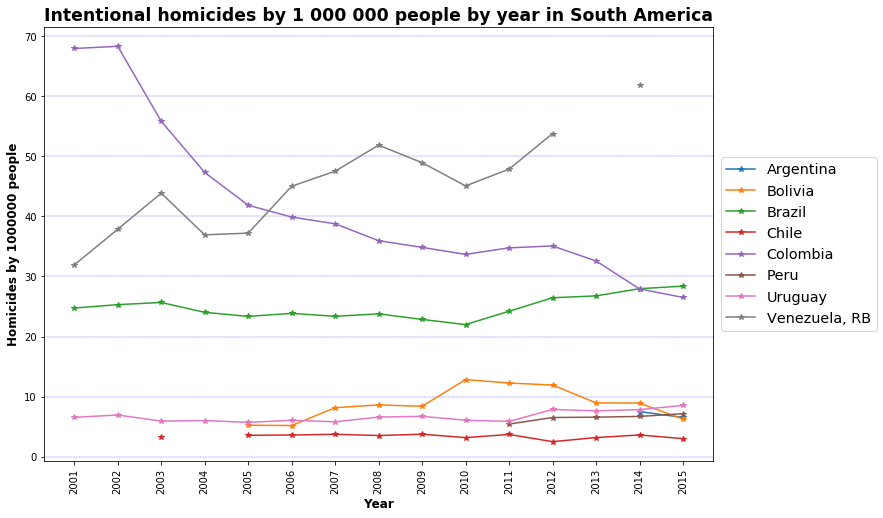

In [31]:
result_region('South America')

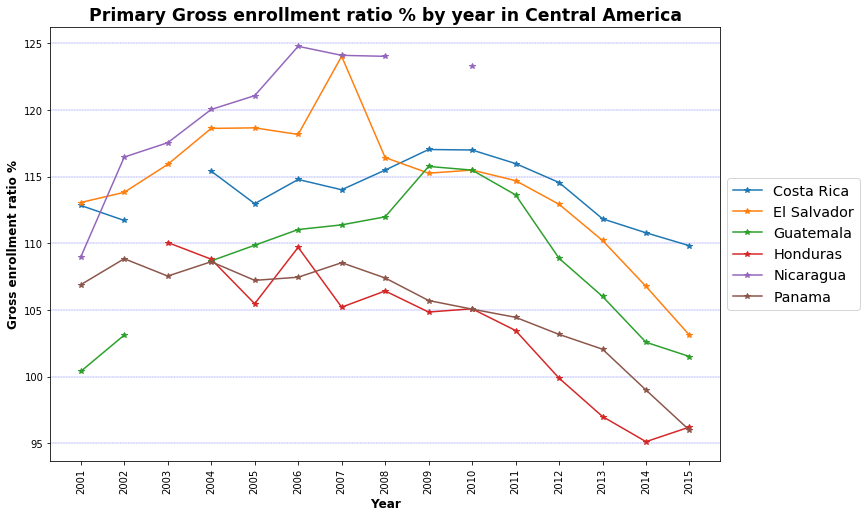

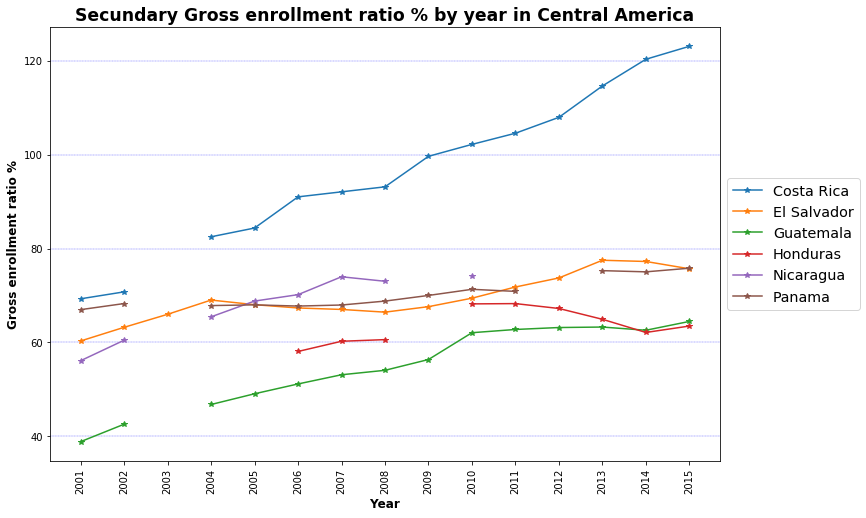

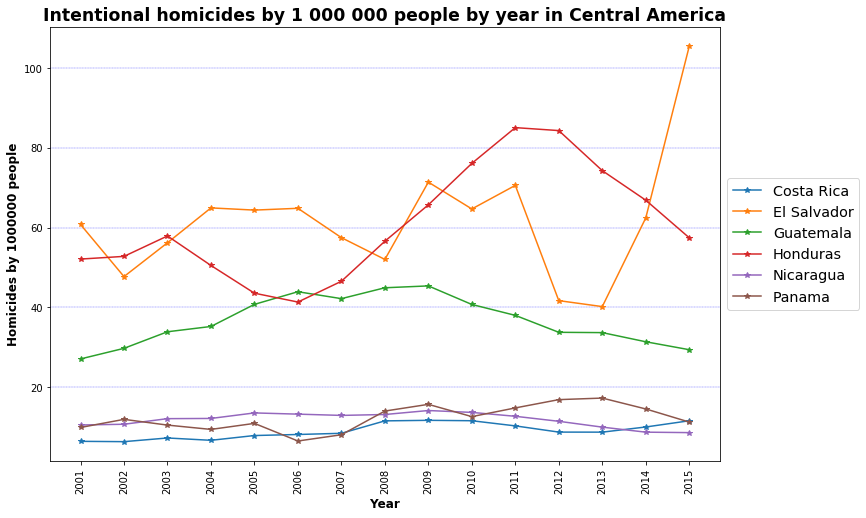

In [32]:
result_region('Central America')

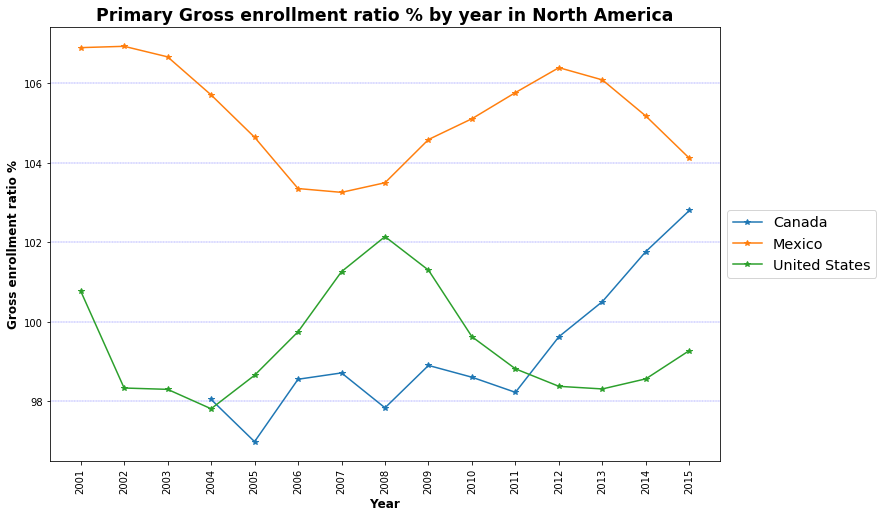

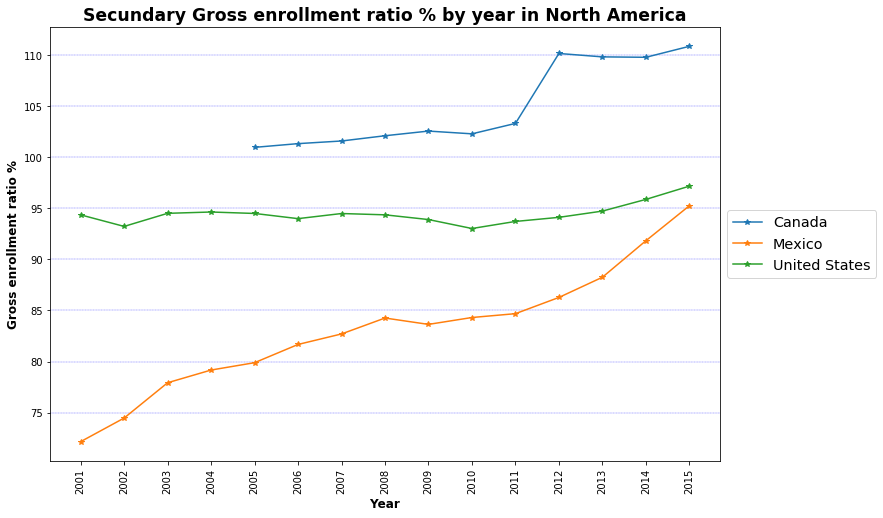

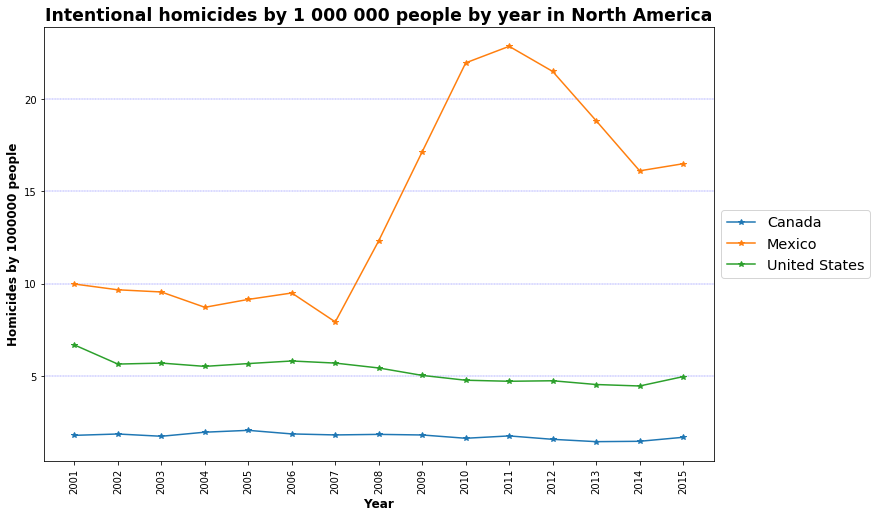

In [33]:
result_region('North America')

It is important to know than having more than 100% in enrrolment may not be so good because it indicates that there is a part of the population that is enrolled and do not correspond to the supposed age for that level of education.

The most important are the changes from one year to another.

Let's focus on primary enrollment and homicides.

In [34]:
import numpy as np
# We are trying to organize to see when did one indicator improved and the other decreased to see if there is a posible relationship
Intentional_homicides_wb=Intentional_homicides_wb.reset_index()
Intentional_homicides_wb=Intentional_homicides_wb.set_index(['Region','IncomeGroup','Country Code','Country Name'])
Intentional_homicides_wb1=Intentional_homicides_wb.reset_index()
Intentional_homicides_wb1=Intentional_homicides_wb1.drop(['Region','IncomeGroup','Country Code'],axis=1)
Intentional_homicides_wb1=Intentional_homicides_wb1.set_index('Country Name')
Intentional_homicides_wb_dif=Intentional_homicides_wb1
Intentional_homicides_wb1=Intentional_homicides_wb1.fillna(0)
#Intentional_homicides_wb_dif

In [35]:
# As 2001 is the first year we don't want to apply the for loop to that column because we don't have a previous year to compare it with
# If the cell is empty we don't want to apply the operation from the for loop either to avoid incorrect values.
# These two facts made us create the for loop and the if else conditions

for i in Intentional_homicides_wb.columns.values:
    if i != '2001':
        for e in Intentional_homicides_wb1.index.values:
            if Intentional_homicides_wb1.loc[e,i]!=0:
                if Intentional_homicides_wb1.loc[e,str(int(i)-1)]!=0:
                    Intentional_homicides_wb_dif.loc[e,i]=Intentional_homicides_wb1.loc[e,i]-Intentional_homicides_wb1.loc[e,str(int(i)-1)]
                else :
                    Intentional_homicides_wb_dif.loc[e,i]=0
                    
Intentional_homicides_wb_dif=Intentional_homicides_wb_dif.replace(0,np.nan)
Intentional_homicides_wb_dif=Intentional_homicides_wb_dif.drop('2001',axis=1)

In [36]:
Intentional_homicides_wb_dif

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,
Chile,NaN,NaN,NaN,NaN,0.048030,0.119973,-0.206215,0.214439,-0.559842,0.524132,-1.200471,0.676620,0.438283,-0.615857
Bolivia,NaN,NaN,NaN,NaN,-0.046021,2.963432,0.469598,-0.232660,4.442466,-0.571015,-0.338933,-2.963677,-0.042680,-2.662049
Uruguay,0.389332,-1.017902,0.092996,-0.303439,0.350933,-0.255333,0.786559,0.125287,-0.645553,-0.197333,1.982598,-0.231296,0.208201,0.701113
Brazil,0.564239,0.357691,-1.638800,-0.673013,0.503880,-0.492928,0.416579,-0.935269,-0.853705,2.212695,2.251885,0.306432,1.197342,0.426800
Colombia,0.362322,-12.478153,-8.501539,-5.462771,-1.966799,-1.117443,-2.811118,-1.118517,-1.160330,1.085023,0.315668,-2.498442,-4.649763,-1.416057
"Venezuela, RB",5.943484,5.995551,-6.928634,0.284933,7.796613,2.510662,4.332850,-2.920931,-3.860395,2.789482,5.915579,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.973687
Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.091953,0.060387,0.116725,0.458836
Nicaragua,0.184211,1.404214,0.050117,1.385473,-0.304685,-0.317344,0.225914,0.997391,-0.471770,-0.974380,-1.255795,-1.460876,-1.260699,-0.114098


In [37]:
#Intentional_homicides_wb

In [38]:
#Now we can repeat the steps for enrollment

enrollment_primary=enrollment_primary.reset_index()
enrollment_primary=enrollment_primary.set_index(['Region','IncomeGroup','Country Code','Country Name'])
enrollment_primary1=enrollment_primary.reset_index()
enrollment_primary1=enrollment_primary1.drop(['Region','IncomeGroup','Country Code'],axis=1)
enrollment_primary1=enrollment_primary1.set_index('Country Name')
enrollment_primary_dif=enrollment_primary1
enrollment_primary1=enrollment_primary1.fillna(0)
#enrollment_primary1.columns.values
#enrollment_primary_dif.drop('index',axis=1)

In [39]:
# We want to create the same dataframe but now for enrollment primary

for i in enrollment_primary.columns.values:
    if i != '2001':
        for e in enrollment_primary1.index.values:
            if enrollment_primary1.loc[e,i]!=0:
                if enrollment_primary1.loc[e,str(int(i)-1)]!=0:
                    enrollment_primary_dif.loc[e,i]=enrollment_primary1.loc[e,i]-enrollment_primary1.loc[e,str(int(i)-1)]
                else :
                    enrollment_primary_dif.loc[e,i]=0
                    
enrollment_primary_dif

enrollment_primary_dif=enrollment_primary_dif.replace(0,np.nan)
enrollment_primary_dif=enrollment_primary_dif.drop('2001',axis=1)

In [40]:
#enrollment_primary_dif

In [41]:
#enrollment_primary

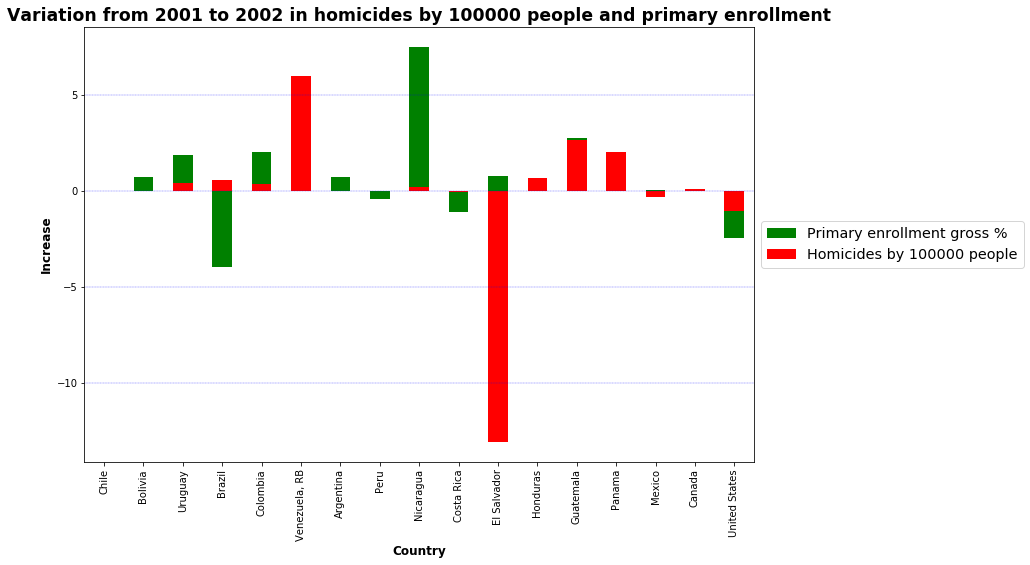

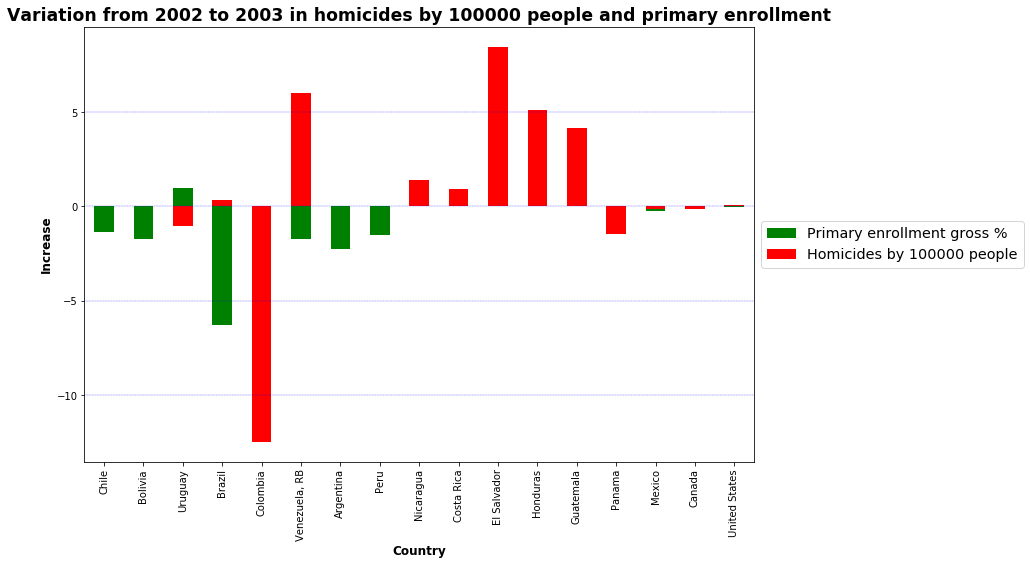

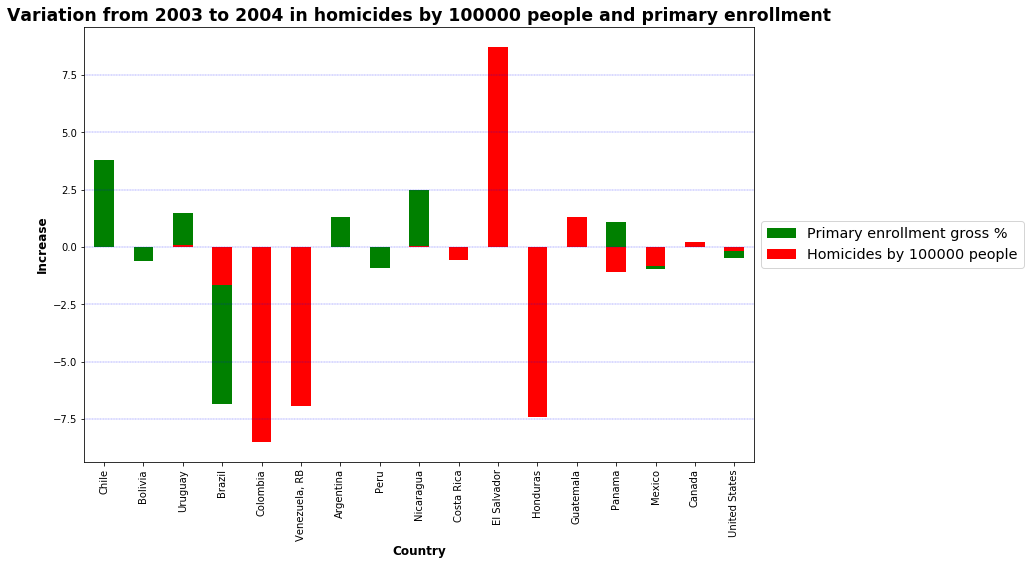

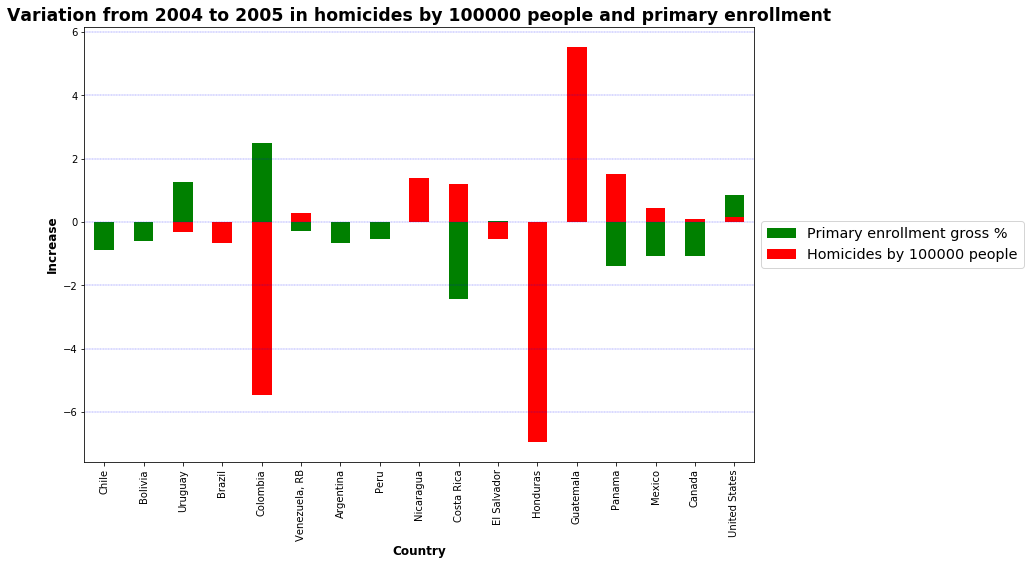

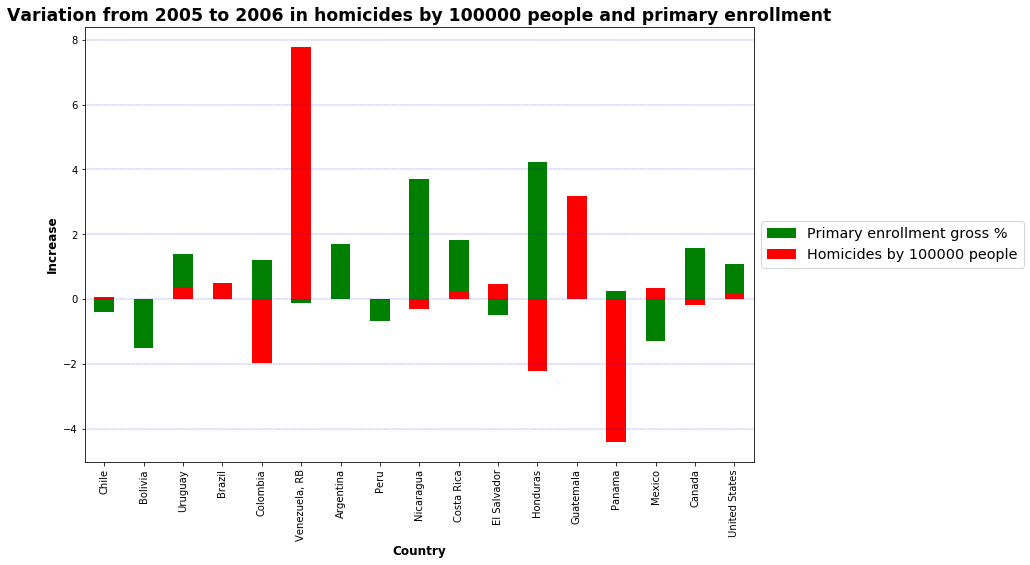

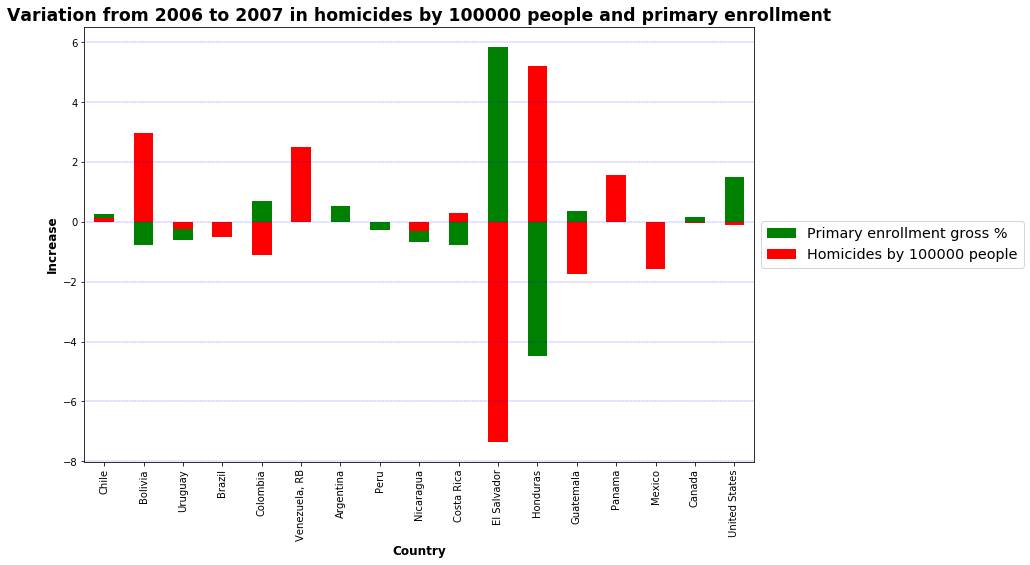

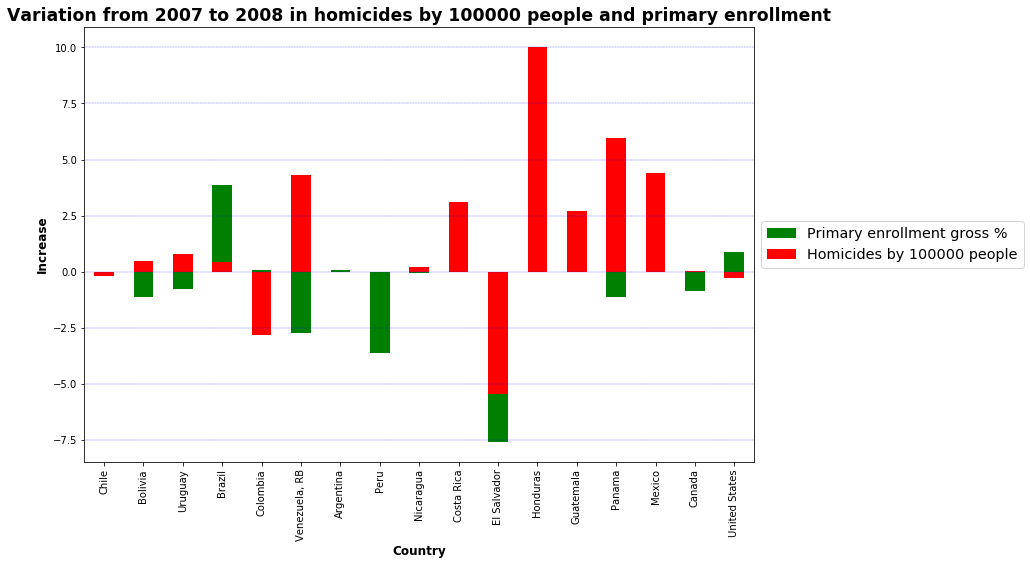

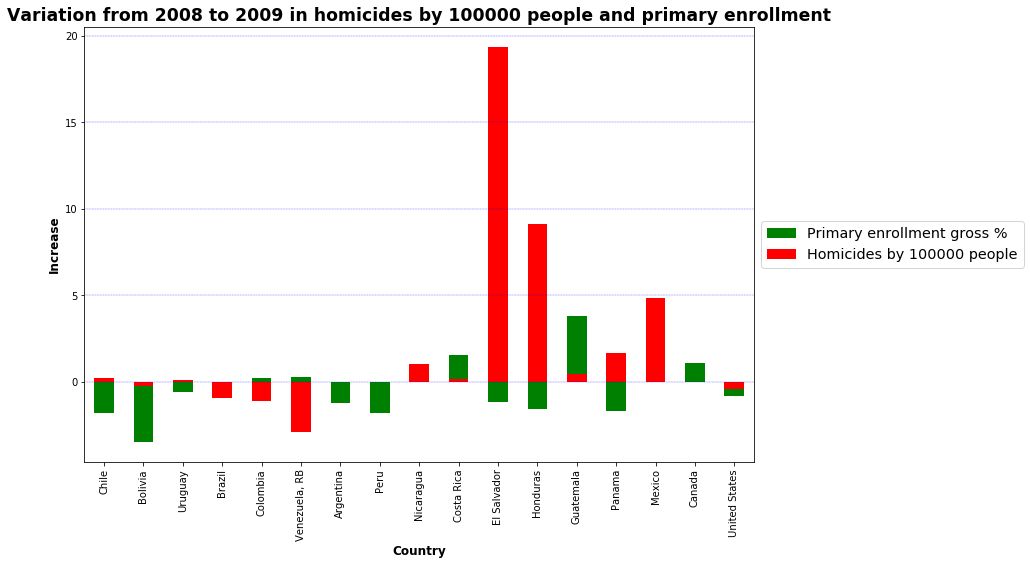

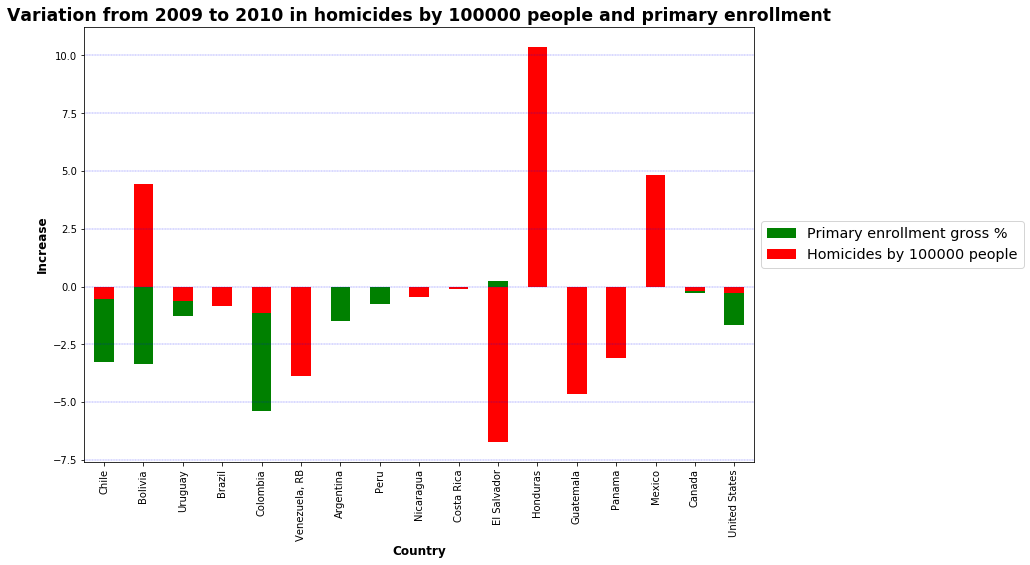

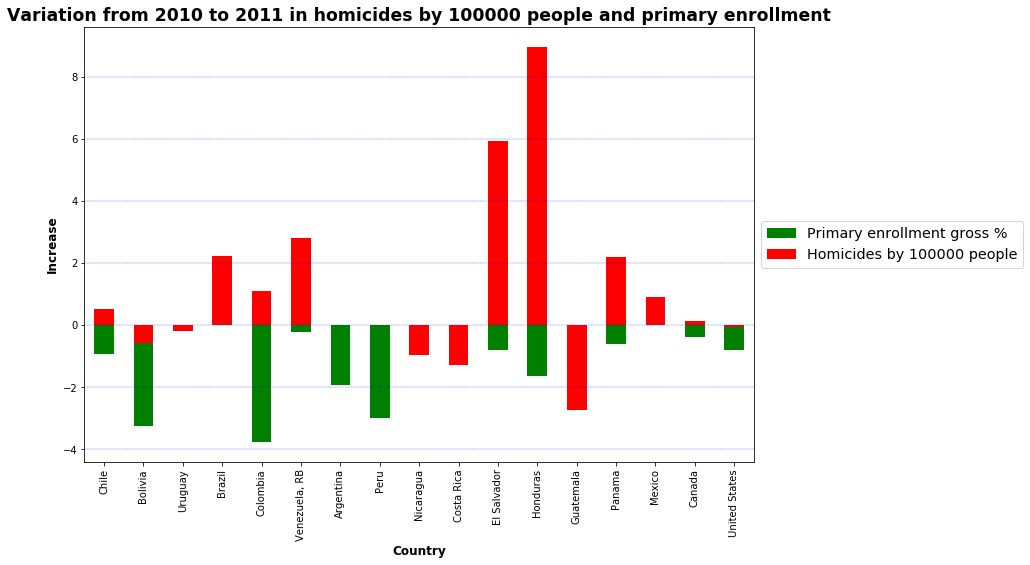

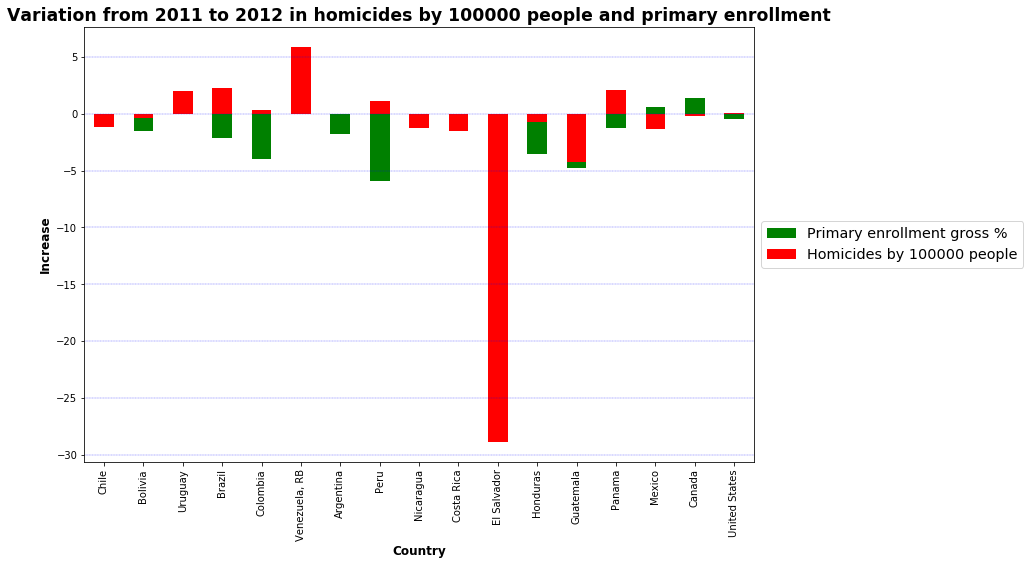

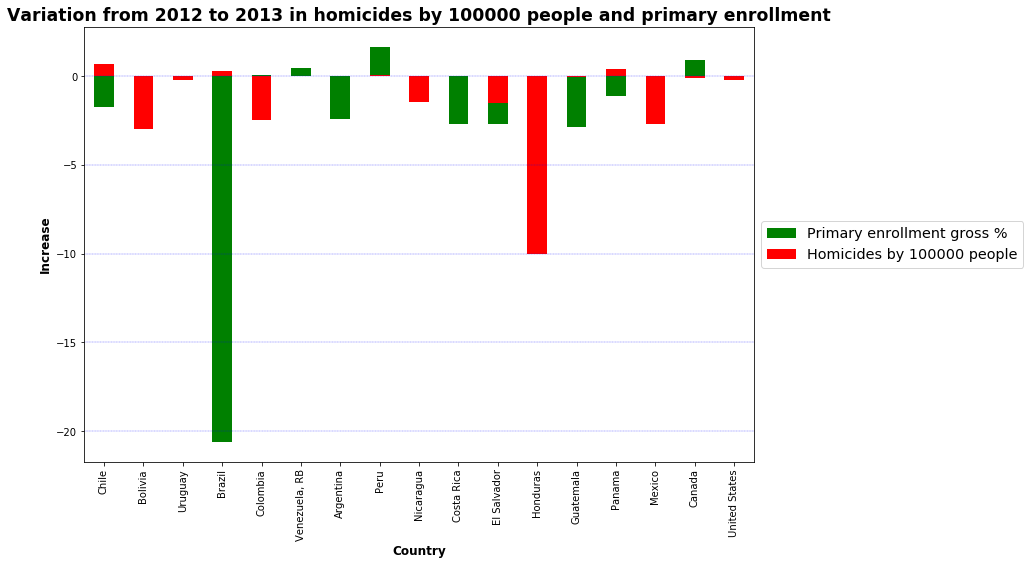

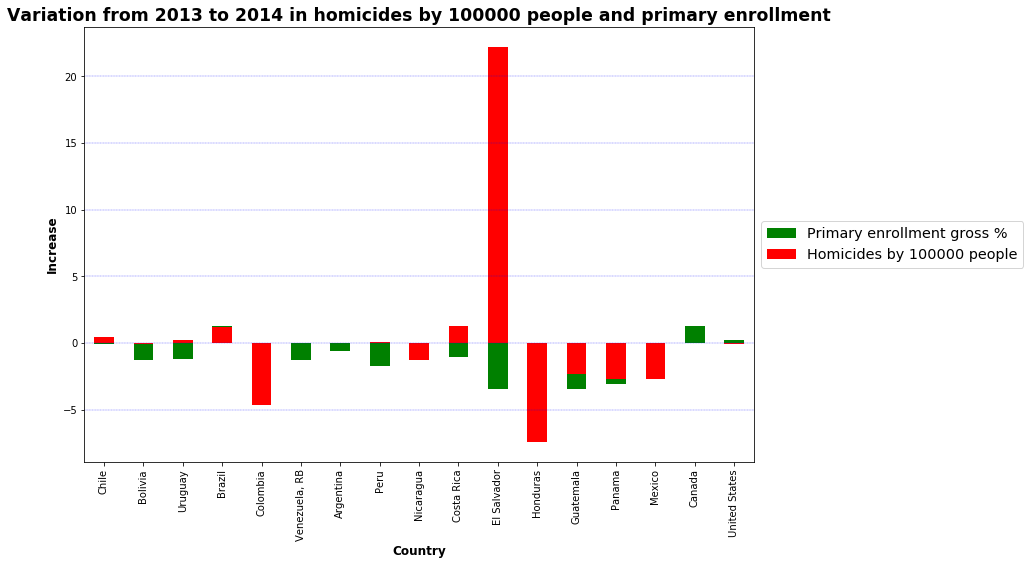

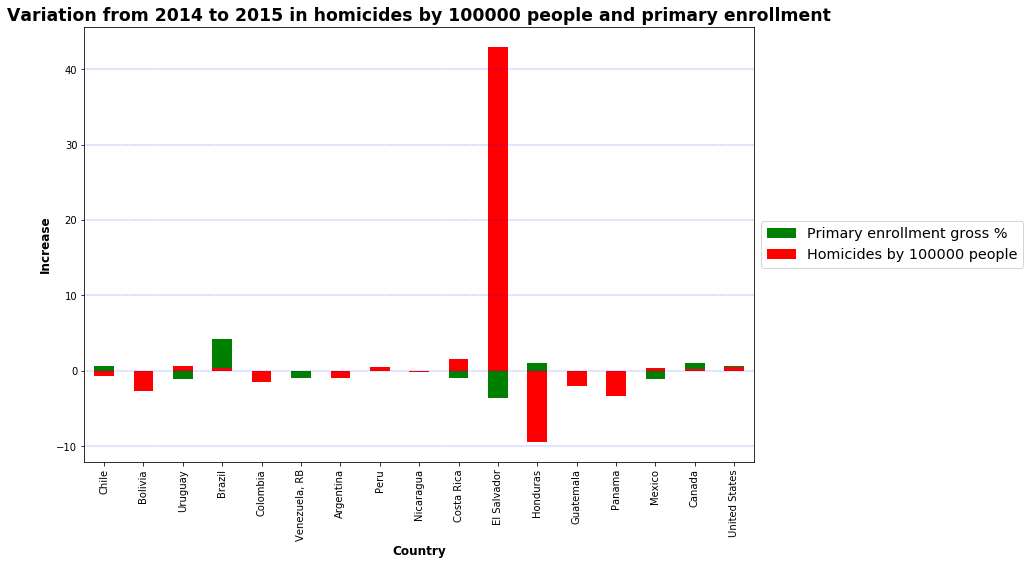

In [42]:
#Having the increases and decreases we proceed to create a plot for the variation of each year

for i in enrollment_primary_dif.columns.values:
    plt.figure();
    enrollment_primary_dif.loc[:,i].plot(kind='bar', label="Primary enrollment gross %",color='green')
    Intentional_homicides_wb_dif.loc[:,i].plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation from '+ str(int(i)-1)+' to ' + str(i) + ' in homicides by 100000 people and primary enrollment',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Country',fontsize='large',fontweight="bold")
    plt.show()
#fig_size[0] = 12
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size


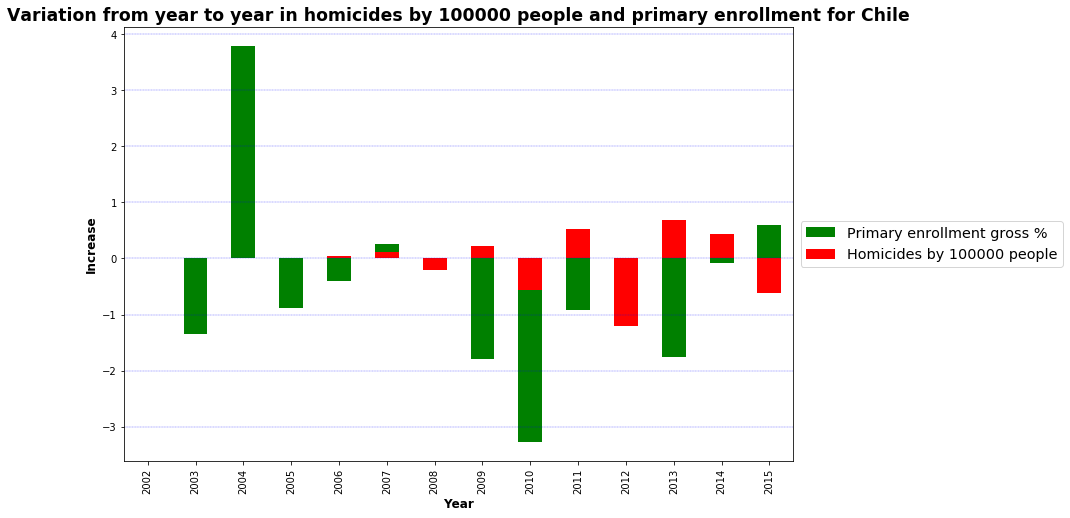

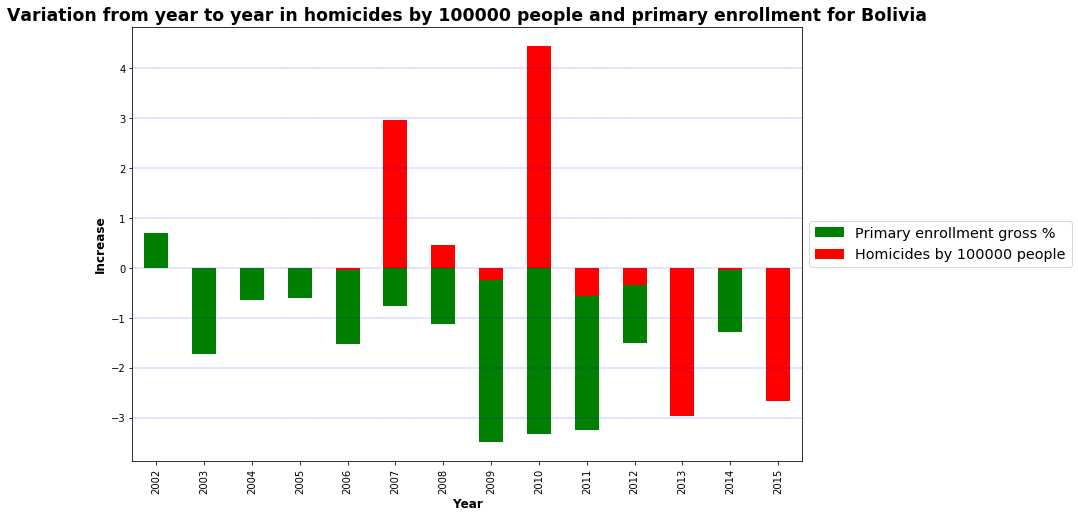

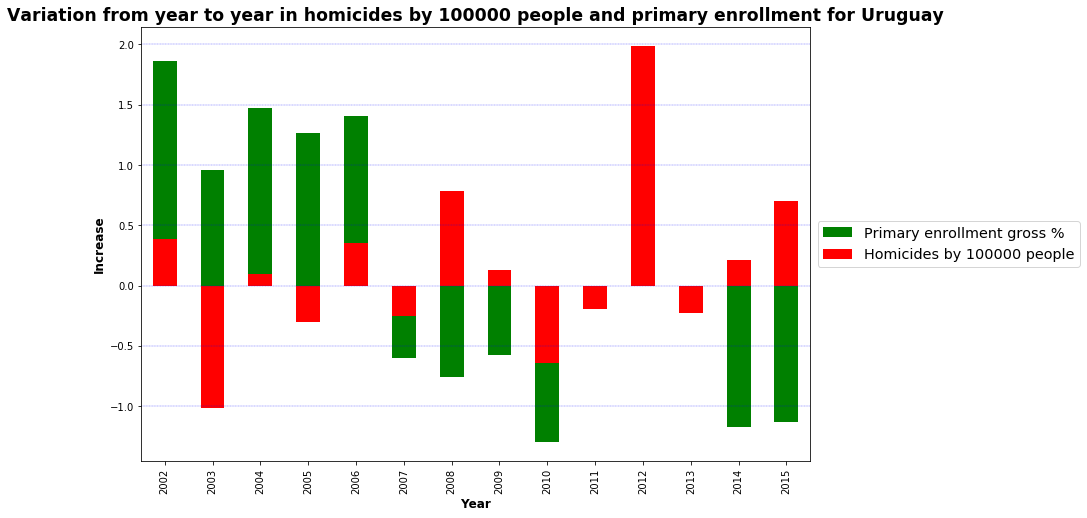

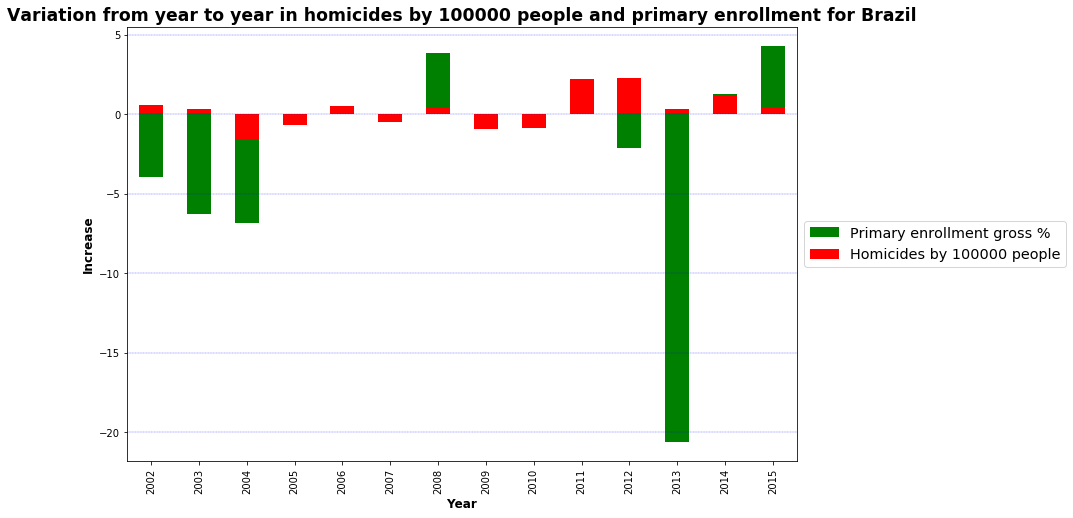

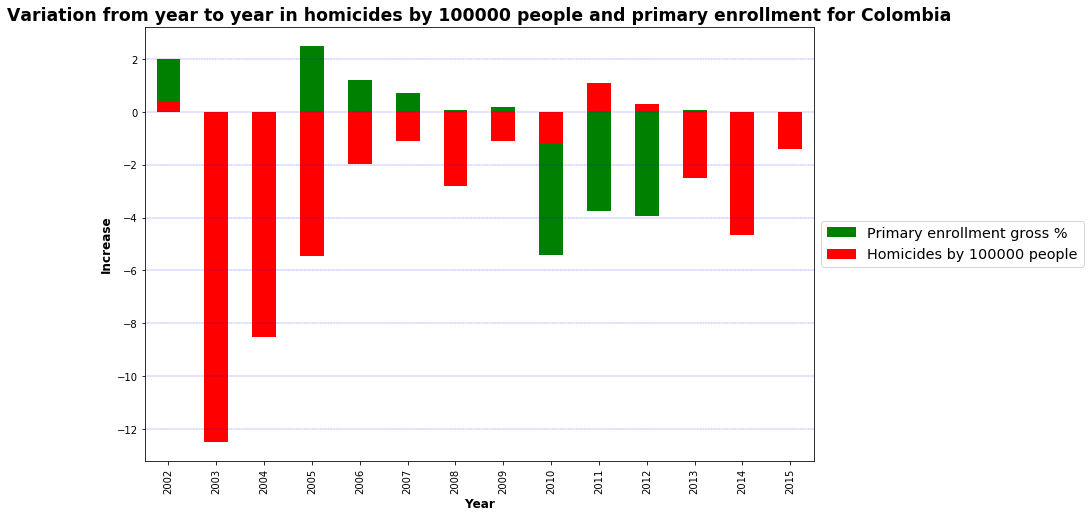

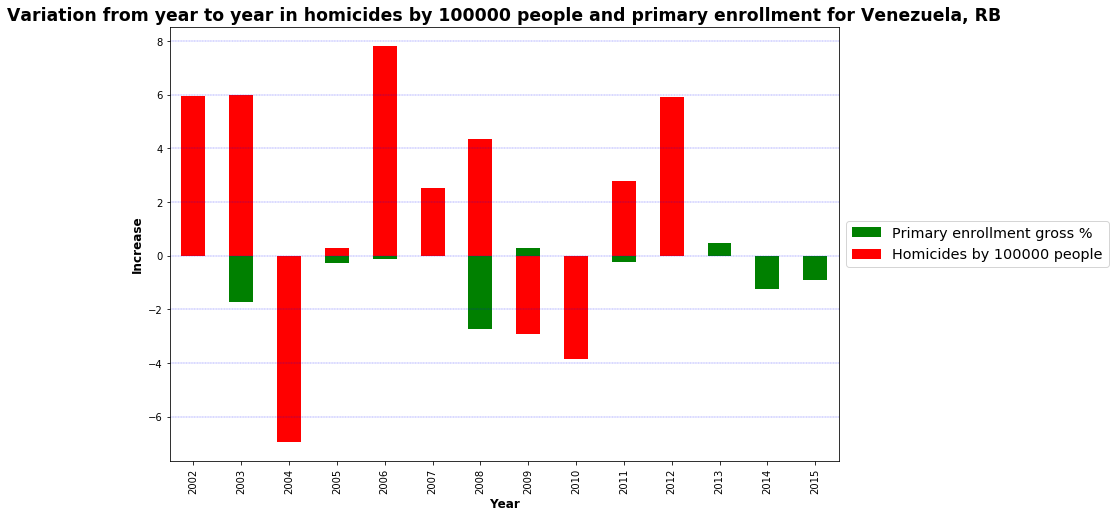

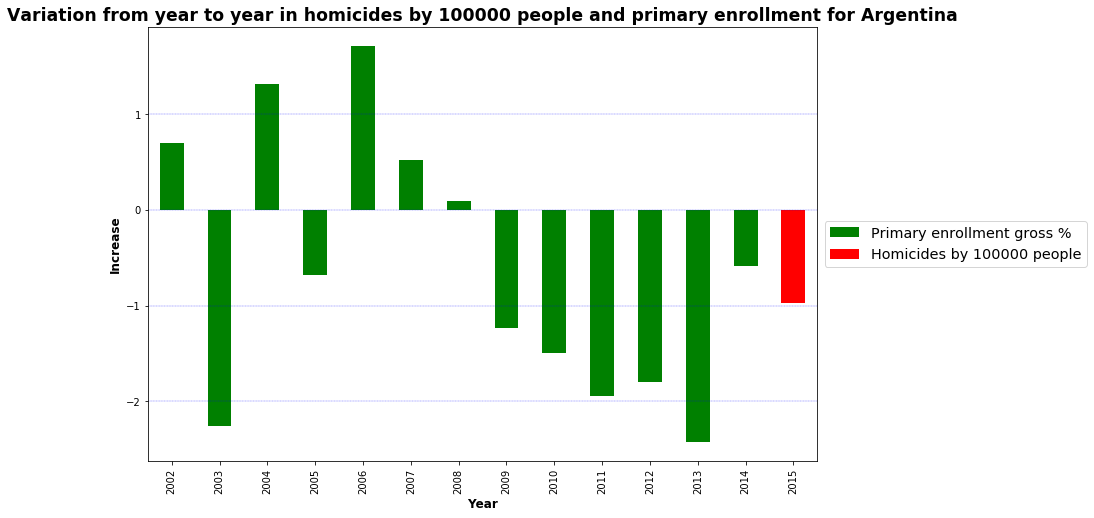

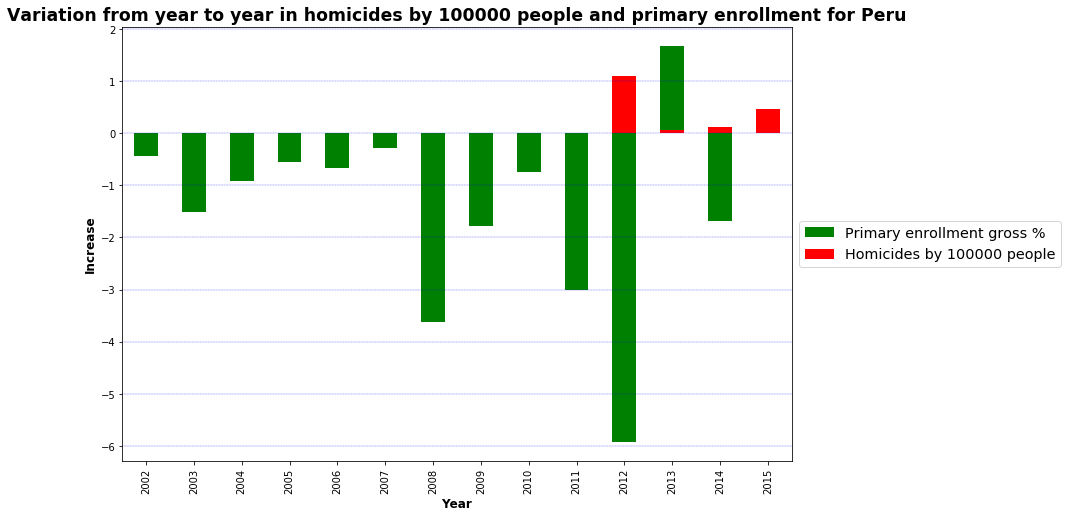

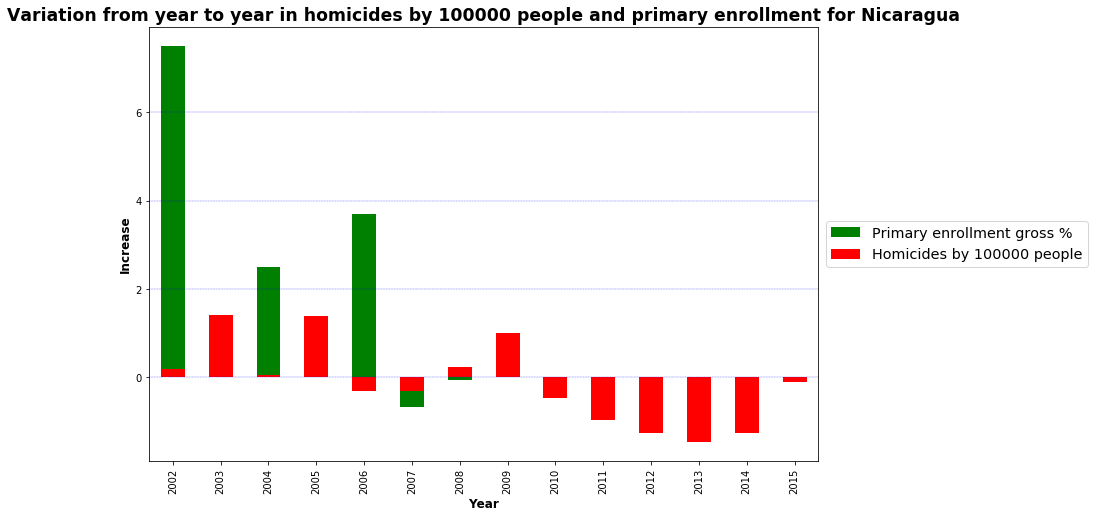

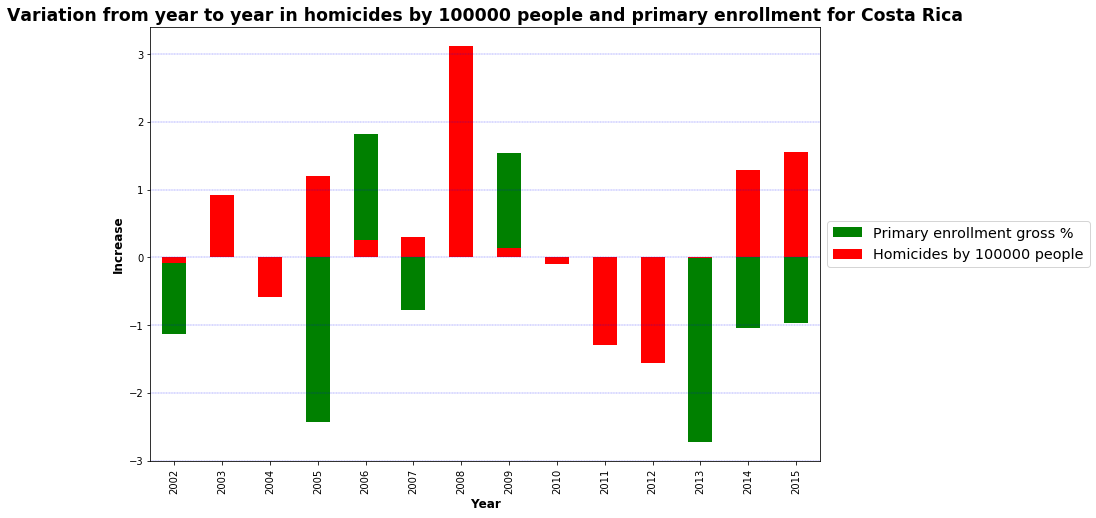

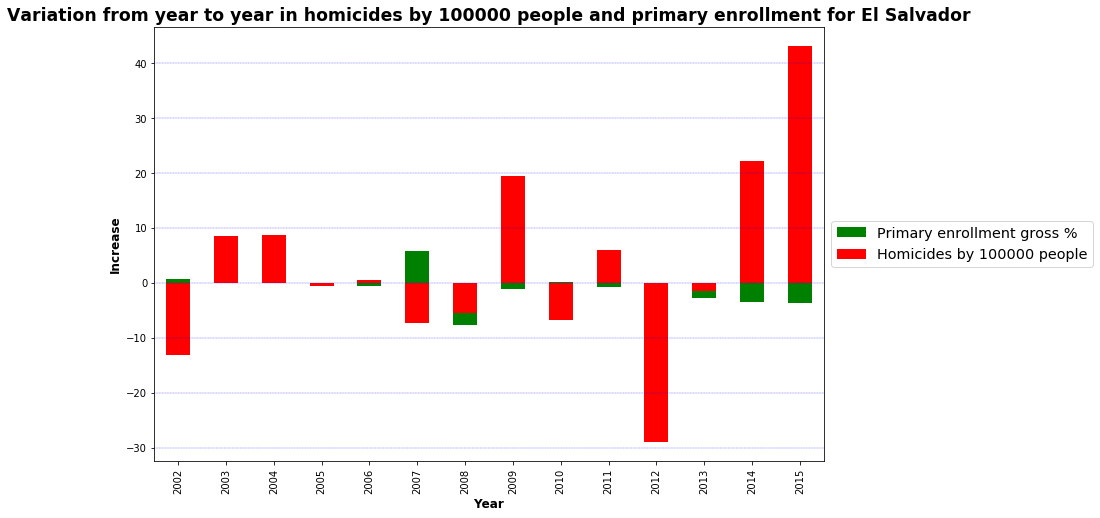

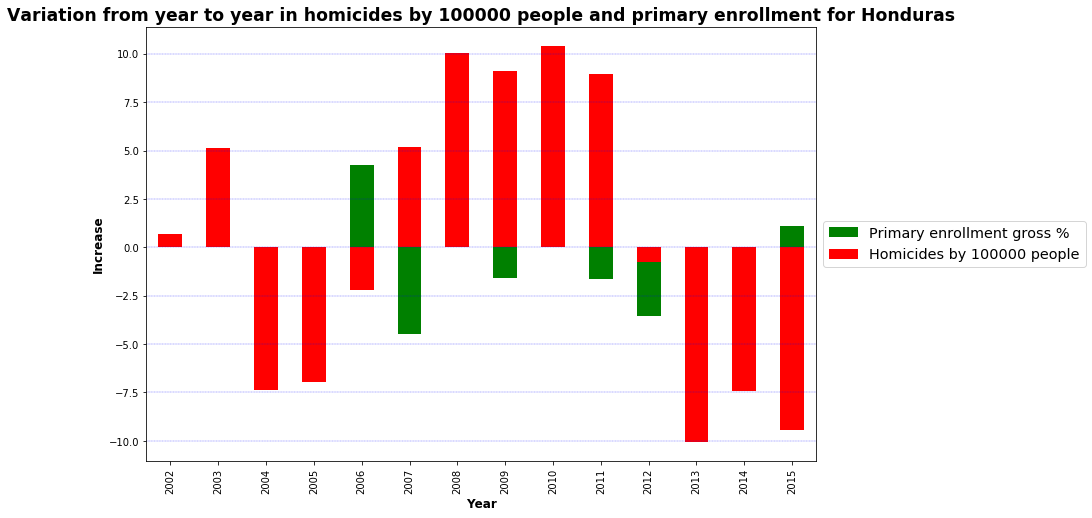

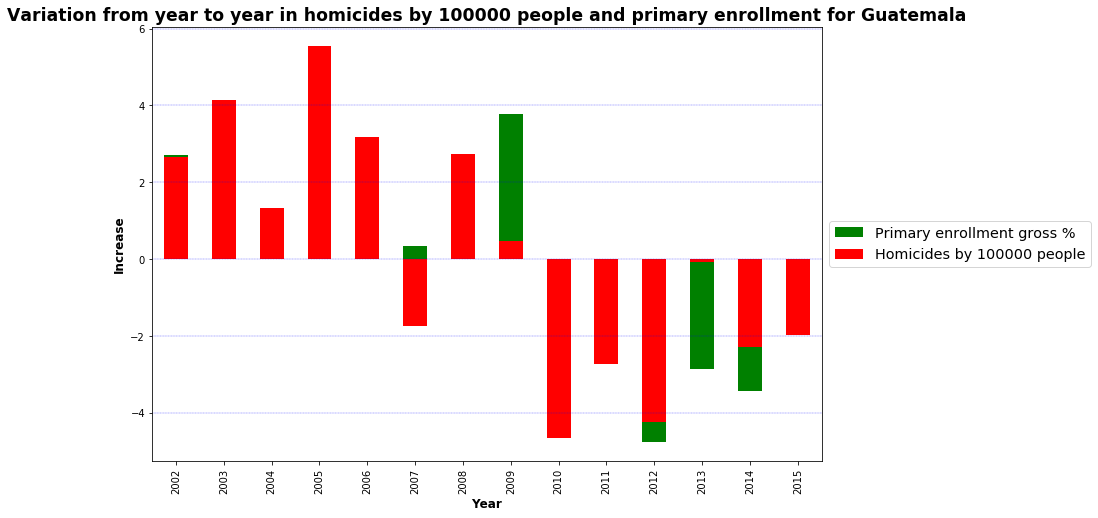

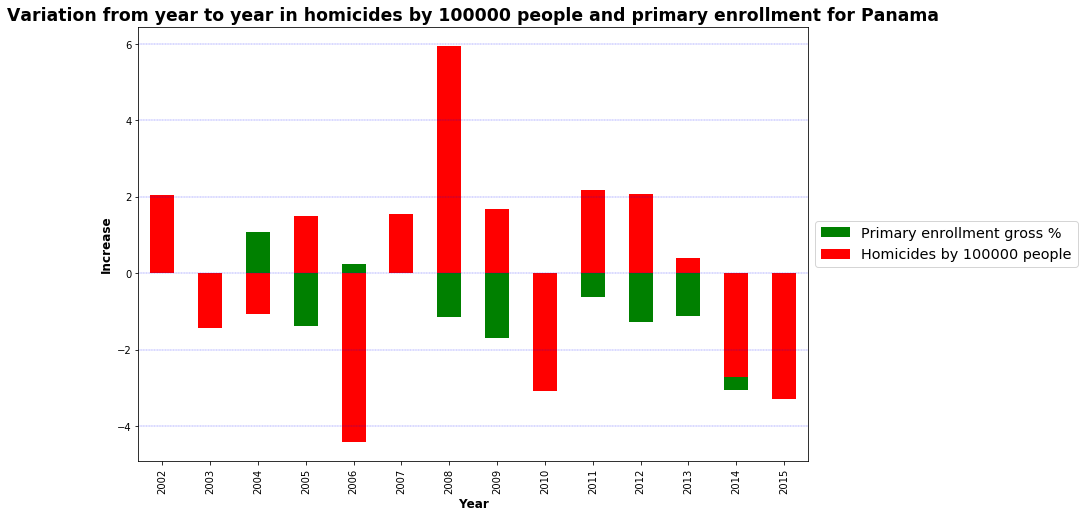

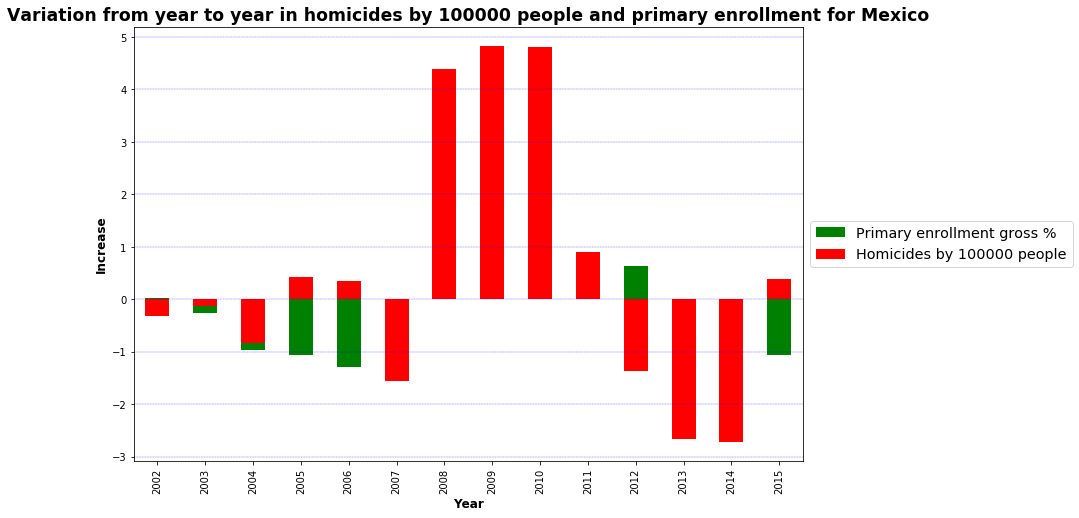

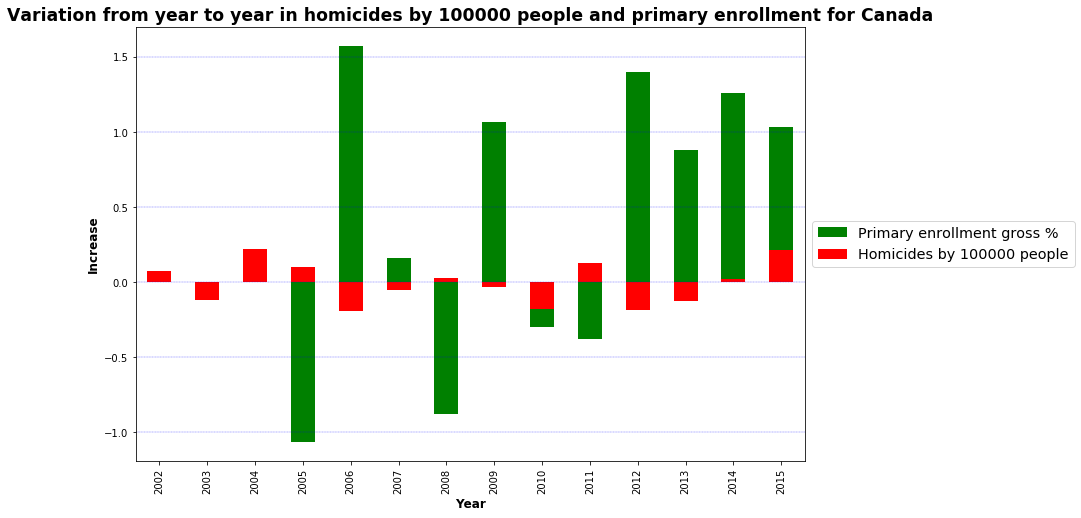

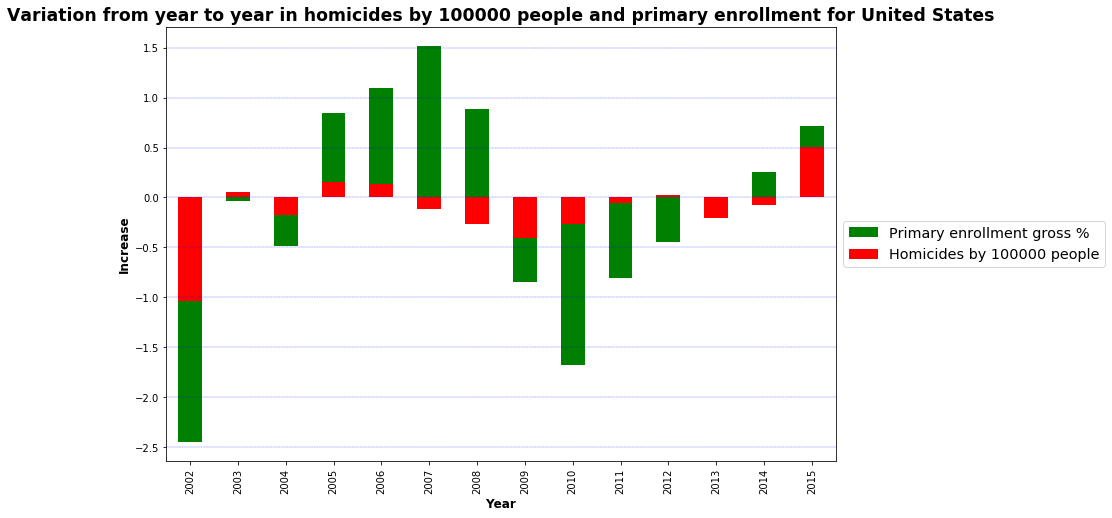

In [43]:
# Now let's see the plot for each country to look for the most significant ones.

for i in enrollment_primary_dif.index.values:
    plt.figure();
    enrollment_primary_dif.loc[i,:].T.plot(kind='bar', label="Primary enrollment gross %",color='green')
    Intentional_homicides_wb_dif.loc[i,:].T.plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation from year to year in homicides by 100000 people and primary enrollment for '+str(i),fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.show()
#fig_size[0] = 12
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size


In [44]:
#We can also look for changes from 2004 to 2014. These years were chosen because of the less missing values. We only had to take out Nicaragua
Intentional_homicides_wb_dif=Intentional_homicides_wb_dif.fillna(0)
enrollment_primary_dif=enrollment_primary_dif.fillna(0)
Dif_total=pd.DataFrame({'Intentional homicide 2004-2014':Intentional_homicides_wb_dif.aggregate(sum,axis=1),'Primary enrollment 2004-2015': enrollment_primary_dif.aggregate(sum,axis=1)}) 

enrollment_primary_dif.loc[:,'2014-2004']=enrollment_primary1.loc[:,'2014']-enrollment_primary1.loc[:,'2004']
Intentional_homicides_wb_dif.loc[:,'2014-2004']=Intentional_homicides_wb1.loc[:,'2014']-Intentional_homicides_wb1.loc[:,'2004']
enrollment_primary_dif1=enrollment_primary_dif.drop('Nicaragua',axis=0)
Intentional_homicides_wb_dif1=Intentional_homicides_wb_dif.drop('Nicaragua',axis=0)
#enrollment_primary1

In [45]:
#enrollment_primary_dif

In [46]:
#Intentional_homicides_wb1

In [47]:
#Intentional_homicides_wb_dif

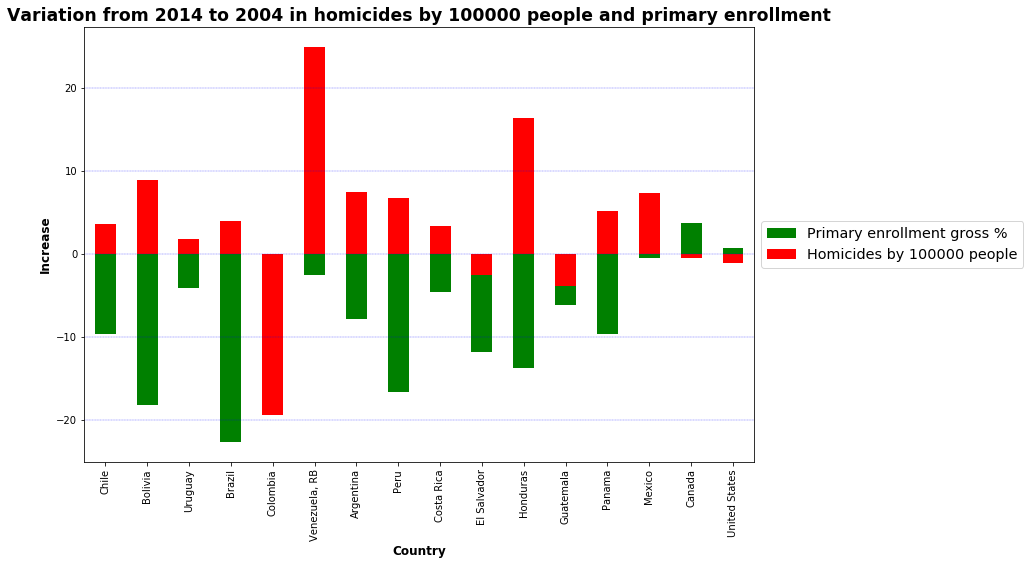

In [48]:
# Let's plot the change from 2004 to 2014. We can appreciate that out of 16 countries, only 3 did not present a relation between homicides and primary enrolment
plt.figure();
enrollment_primary_dif1.loc[:,'2014-2004'].plot(kind='bar', label="Primary enrollment gross %",color='green')
Intentional_homicides_wb_dif1.loc[:,'2014-2004'].plot(kind='bar',label='Homicides by 100000 people',color='red')
plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
plt.title('Variation from 2014 to 2004 in homicides by 100000 people and primary enrollment',fontsize='xx-large',fontweight="extra bold")
plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
plt.ylabel('Increase',fontsize='large',fontweight="bold")
plt.xlabel('Country',fontsize='large',fontweight="bold")
plt.show()

In [49]:
#Intentional_homicides_wb_dif
#enrollment_primary_dif

In [50]:
#Dif_total
#Let's count how many countries decreased in one indicator and increased in the other throughout 2001 to 2015 year by year

counting=list()
for i in Intentional_homicides_wb_dif.columns.values:    
    for e in Intentional_homicides_wb_dif.index.values:
        if Intentional_homicides_wb_dif.loc[e,i]>0:
            if enrollment_primary_dif.loc[e,i]<0:
                counting.append(e+i)
        elif Intentional_homicides_wb_dif.loc[e,i]<0:
            if enrollment_primary_dif.loc[e,i]>0:
                counting.append(e+i)
#counting

# To be able to take out percentages it is necessary to create this second list counting when there wasn't missing values for neither of both indicators.
counting2=list()
for i in Intentional_homicides_wb_dif.columns.values:    
    for e in Intentional_homicides_wb_dif.index.values:
        if Intentional_homicides_wb_dif.loc[e,i]!=0:
            if enrollment_primary_dif.loc[e,i]!=0:
                counting2.append(e+i)
#counting2

#Let's also count the missing relationships to know how many data we are missing
counting3=list()
for i in Intentional_homicides_wb_dif.columns.values:    
    for e in Intentional_homicides_wb_dif.index.values:
        if Intentional_homicides_wb_dif.loc[e,i]==0:
            counting3.append(e+i)
        elif Intentional_homicides_wb_dif.loc[e,i]!=0:
            if enrollment_primary_dif.loc[e,i]==0:
                counting3.append(e+i)
#counting3

In [51]:
# This is the number of significant relationships found
len(counting)

95

In [52]:
#This is the number of posible relationships 
len(counting2)

196

In [53]:
#This is the number of missing relationships because of missing values
len(counting3)

59

In [54]:
#Percentage of missing relationships
percNA=len(counting3)*100/(len(counting3)+len(counting2))
percNA

23.137254901960784

In [55]:
percrelation=len(counting)*100/len(counting2)
percrelation
# This means that in 48% of the observations we could observe a relationship between increase or decrease of 
# number of homicides and increase or decrease of primary enrollment

48.46938775510204

In [56]:
countingcountry=list()
for i in Intentional_homicides_wb_dif.columns.values:    
    for e in Intentional_homicides_wb_dif.index.values:
        if Intentional_homicides_wb_dif.loc[e,i]>0:
            if enrollment_primary_dif.loc[e,i]<0:
                countingcountry.append(e)
        elif Intentional_homicides_wb_dif.loc[e,i]<0:
            if enrollment_primary_dif.loc[e,i]>0:
                countingcountry.append(e)

In [57]:
# Now let's try to see for each country the percentage

In [58]:
countingcountry2=dict()
for e in Intentional_homicides_wb_dif.index.values:
    f=countingcountry.count(e)
    countingcountry2[e]=str(f)
print(countingcountry2)
# This is the number of significant relationships by country

{'Chile': '7', 'Bolivia': '4', 'Uruguay': '7', 'Brazil': '5', 'Colombia': '8', 'Venezuela, RB': '7', 'Argentina': '1', 'Peru': '3', 'Nicaragua': '2', 'Costa Rica': '5', 'El Salvador': '9', 'Honduras': '6', 'Guatemala': '1', 'Panama': '9', 'Mexico': '6', 'Canada': '9', 'United States': '6'}


In [59]:
# But again to be able to take out the real relationships we need to find how possible relationships were for each country
countingcountryt=list()
for i in Intentional_homicides_wb_dif.columns.values:    
    for e in Intentional_homicides_wb_dif.index.values:
        if Intentional_homicides_wb_dif.loc[e,i]!=0:
            if enrollment_primary_dif.loc[e,i]!=0:
                countingcountryt.append(e)

In [60]:
countingcountry2t=dict()
for e in Intentional_homicides_wb_dif.index.values:
    f=countingcountryt.count(e)
    countingcountry2t[e]=str(f)
print(countingcountry2t)
# This is the number of times for each country having two indicators to relate. As we can see, Argentina has a lot of missing values

{'Chile': '11', 'Bolivia': '11', 'Uruguay': '12', 'Brazil': '11', 'Colombia': '13', 'Venezuela, RB': '12', 'Argentina': '2', 'Peru': '5', 'Nicaragua': '8', 'Costa Rica': '13', 'El Salvador': '15', 'Honduras': '13', 'Guatemala': '13', 'Panama': '15', 'Mexico': '15', 'Canada': '12', 'United States': '15'}


In [61]:
countingcountryNa=list()
for i in Intentional_homicides_wb_dif.columns.values:    
    for e in Intentional_homicides_wb_dif.index.values:
        if Intentional_homicides_wb_dif.loc[e,i]==0:
             countingcountryNa.append(e)
        elif Intentional_homicides_wb_dif.loc[e,i]!=0:
            if enrollment_primary_dif.loc[e,i]==0:
                countingcountryNa.append(e)

In [62]:
countingcountry2Na=dict()
for e in Intentional_homicides_wb_dif.index.values:
    f=countingcountryNa.count(e)
    countingcountry2Na[e]=str(f)
print(countingcountry2Na)
# This is the number of times for each country not having two indicators to relate. Because of a missing value

{'Chile': '4', 'Bolivia': '4', 'Uruguay': '3', 'Brazil': '4', 'Colombia': '2', 'Venezuela, RB': '3', 'Argentina': '13', 'Peru': '10', 'Nicaragua': '7', 'Costa Rica': '2', 'El Salvador': '0', 'Honduras': '2', 'Guatemala': '2', 'Panama': '0', 'Mexico': '0', 'Canada': '3', 'United States': '0'}


In [63]:
# let's take out the percentage of meaningfull relationships by country.
new=dict()
for key in countingcountry2t:
    new[str(key)]=str((round(int(countingcountry2.get(str(key)))*100/int(countingcountry2t.get(str(key))),1)))
print(new)

{'Chile': '63.6', 'Bolivia': '36.4', 'Uruguay': '58.3', 'Brazil': '45.5', 'Colombia': '61.5', 'Venezuela, RB': '58.3', 'Argentina': '50.0', 'Peru': '60.0', 'Nicaragua': '25.0', 'Costa Rica': '38.5', 'El Salvador': '60.0', 'Honduras': '46.2', 'Guatemala': '7.7', 'Panama': '60.0', 'Mexico': '40.0', 'Canada': '75.0', 'United States': '40.0'}


In [64]:
# let's take out the percentage of missing relationships by country.
new2=dict()
for key in countingcountry2Na:
    new2[str(key)]=str((round(int(countingcountry2Na.get(str(key)))*100/(int(countingcountry2Na.get(str(key)))+int(countingcountry2t.get(str(key)))),1)))
print(new2)

{'Chile': '26.7', 'Bolivia': '26.7', 'Uruguay': '20.0', 'Brazil': '26.7', 'Colombia': '13.3', 'Venezuela, RB': '20.0', 'Argentina': '86.7', 'Peru': '66.7', 'Nicaragua': '46.7', 'Costa Rica': '13.3', 'El Salvador': '0.0', 'Honduras': '13.3', 'Guatemala': '13.3', 'Panama': '0.0', 'Mexico': '0.0', 'Canada': '20.0', 'United States': '0.0'}


In [65]:
CentralAmerica=int(countingcountry2.get('Nicaragua'))+int(countingcountry2.get('Costa Rica'))+int(countingcountry2.get('El Salvador'))+int(countingcountry2.get('Honduras'))+int(countingcountry2.get('Guatemala'))+int(countingcountry2.get('Panama'))
NorthAmerica=int(countingcountry2.get('United States'))+int(countingcountry2.get('Canada'))+int(countingcountry2.get('Mexico'))
SouthAmerica=len(counting)-CentralAmerica-NorthAmerica

In [66]:
enrollment_primary.loc['South America']
# 8 countries
enrollment_primary.loc['North America']
# 3 countries
enrollment_primary.loc['Central America']
# 6 countries
lennorthamerica=int(countingcountry2t.get('United States'))+int(countingcountry2t.get('Canada'))+int(countingcountry2t.get('Mexico'))
lencentralamerica=int(countingcountry2t.get('Nicaragua'))+int(countingcountry2t.get('Costa Rica'))+int(countingcountry2t.get('El Salvador'))+int(countingcountry2t.get('Honduras'))+int(countingcountry2t.get('Guatemala'))+int(countingcountry2t.get('Panama'))
lensouthamerica=len(counting2)-lencentralamerica-lennorthamerica
percrelationSA=SouthAmerica*100/lensouthamerica
percrelationCA=CentralAmerica*100/lencentralamerica
percrelationNA=NorthAmerica*100/lennorthamerica

CentralAmericaNa=int(countingcountry2Na.get('Nicaragua'))+int(countingcountry2Na.get('Costa Rica'))+int(countingcountry2Na.get('El Salvador'))+int(countingcountry2Na.get('Honduras'))+int(countingcountry2Na.get('Guatemala'))+int(countingcountry2Na.get('Panama'))
NorthAmericaNa=int(countingcountry2Na.get('United States'))+int(countingcountry2Na.get('Canada'))+int(countingcountry2Na.get('Mexico'))
SouthAmericaNa=len(counting3)-CentralAmerica-NorthAmerica

percrelationSANa=SouthAmericaNa*100/(lensouthamerica+SouthAmericaNa)
percrelationCANa=CentralAmericaNa*100/(lencentralamerica+CentralAmericaNa)
percrelationNANa=NorthAmericaNa*100/(lennorthamerica+NorthAmericaNa)

In [67]:
percrelationSA

54.54545454545455

In [68]:
percrelationCA

41.55844155844156

In [69]:
percrelationNA

50.0

In [70]:
percrelationSANa

7.228915662650603

In [71]:
percrelationCANa

14.444444444444445

In [72]:
percrelationNANa

6.666666666666667

In [73]:
# We can appreciate that the relationships are similar through America and that is not significant because it is only present in about half percent of the observed data
# Now let's look for a relationship in the quality of the education for the countries where we have the data

# Importing Mean science performance- PISA score

In [78]:
data6=pd.ExcelFile('Mean science performance, 2006 through 2015.xlsx')
#print(data6.sheet_names)
df6=data6.parse('Table I.2.4a',header=11)
df6=df6.drop(df6.loc[:,'Unnamed: 7':],axis=1)
df6=df6.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 5'],axis=1)
sciperf=df6.loc['Australia':'Malaysia*',:]
#sciperf.info()

#sciperf.index.values

sciperf=sciperf.loc[['Uruguay','Chile', 'Brazil', 'Colombia', 'Mexico','Costa Rica','Canada', 'United States'],:]
sciperf.rename(columns={'PISA 2006':'2006','PISA 2009':'2009','PISA 2012':'2012','PISA 2015':'2015'},inplace=True)
sciperfdif=sciperf
sciperf=sciperf.replace('m',0)
#sciperfdif
sciperf

,2006,2009,2012,2015
Uruguay,428.1339,427.2142,415.8429,435.3630
Chile,438.1774,447.4674,444.9339,446.9561
Brazil,390.3316,405.4040,401.6197,400.6821
Colombia,388.0383,401.7501,398.6786,415.7288
Mexico,409.6520,415.9087,414.9201,415.7099
Costa Rica,0.0000,430.4813,429.3510,419.6080
Canada,534.4698,528.7050,525.4413,527.7047
United States,488.9068,502.0023,497.4098,496.2424


In [75]:
#Because we want to look for the variation we need to start with 2009 so we have the previous vakues to compare with.

Pisayears=['2009','2012','2015']
for i in Pisayears:
    for e in sciperfdif.index.values:
        sciperfdif.loc[e,i]=sciperf.loc[e,i]- sciperf.loc[e,str(int(i)-3)]
                    
sciperfdif=sciperfdif.replace(0,np.nan)
sciperfdif=sciperfdif.drop('2006',axis=1)
sciperfdif.loc['Costa Rica','2009']=0
#sciperfdif

In [76]:
Intentional_homicides_wbPISA=Intentional_homicides_wb.reset_index()
Intentional_homicides_wbPISA=Intentional_homicides_wbPISA.set_index('Country Name')
Intentional_homicides_wbPISA=Intentional_homicides_wbPISA.loc[['Uruguay','Chile', 'Brazil', 'Colombia', 'Mexico','Costa Rica','Canada', 'United States'],:]

In [77]:
Intentional_homicides_wbPISA=Intentional_homicides_wbPISA.fillna(0)
Intentional_homicides_wbPISA=Intentional_homicides_wbPISA.drop(['Region','Country Code', 'IncomeGroup'],axis=1)
Intentional_homicides_wbPISA=Intentional_homicides_wbPISA.drop(['2001','2002'],axis=1)
Intentional_homicides_wbPISAd=Intentional_homicides_wbPISA
for i in Pisayears:
    for e in Intentional_homicides_wbPISA.index.values:
        if Intentional_homicides_wbPISA.loc[e,i]!=0:
            if Intentional_homicides_wbPISA.loc[e,str(int(i)-3)]!=0:
                Intentional_homicides_wbPISAd.loc[e,i]=Intentional_homicides_wbPISA.loc[e,i]-Intentional_homicides_wbPISA.loc[e,str(int(i)-3)]
            else :
                Intentional_homicides_wbPISAd.loc[e,i]=0
                    
Intentional_homicides_wbPISAd=Intentional_homicides_wbPISAd.replace(0,np.nan)

Intentional_homicides_wbPISAd=Intentional_homicides_wbPISAd.loc[:,['2009','2012','2015']]

In [78]:
#Intentional_homicides_wbPISAd

In [79]:
def HomMeSci(year):
    plt.figure();
    sciperfdif.loc[:,year].plot(kind='bar', label="Mean Science",color='purple')
    Intentional_homicides_wbPISAd.loc[:,year].plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation for '+year+' in homicides by 100000 people and mean science score',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Country',fontsize='large',fontweight="bold")
    plt.show()

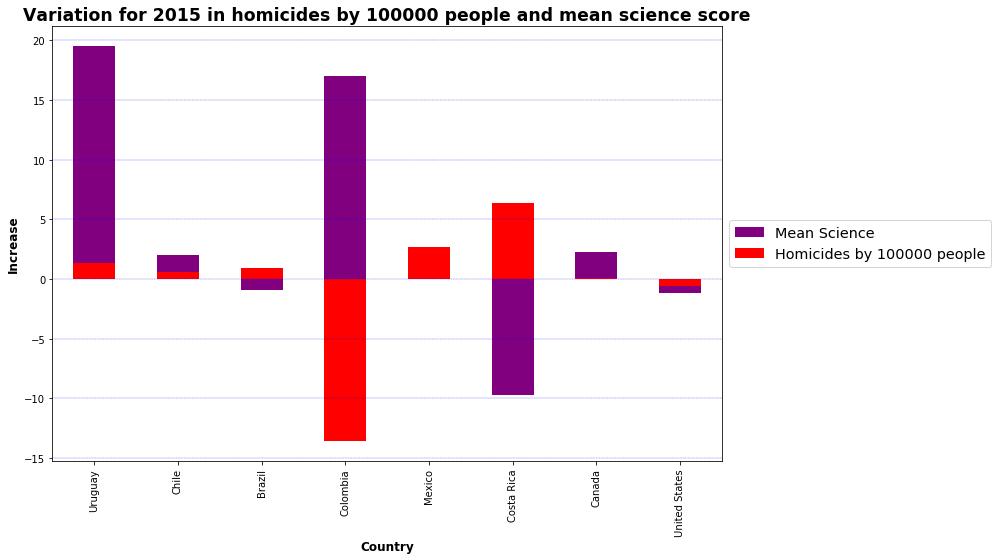

In [80]:
HomMeSci('2015')

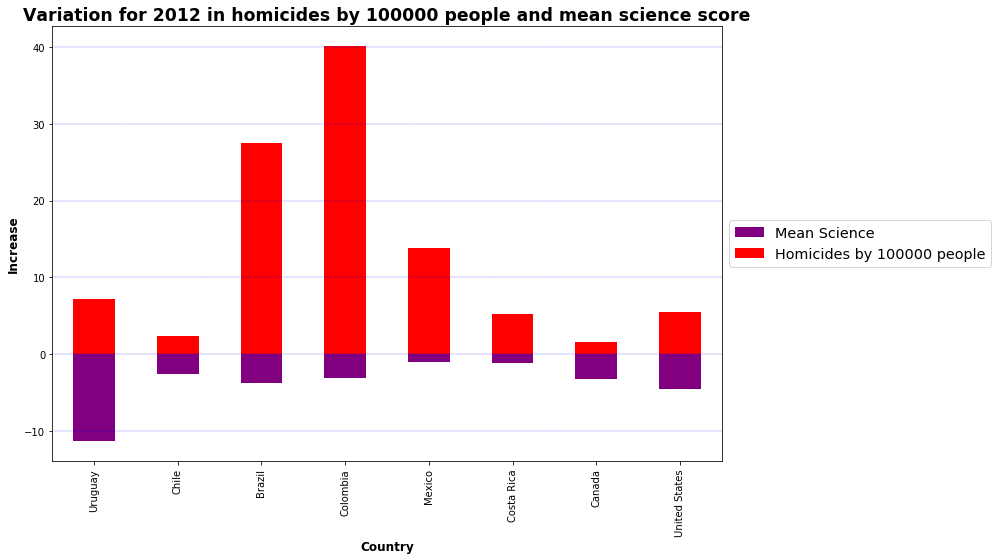

In [81]:
HomMeSci('2012')

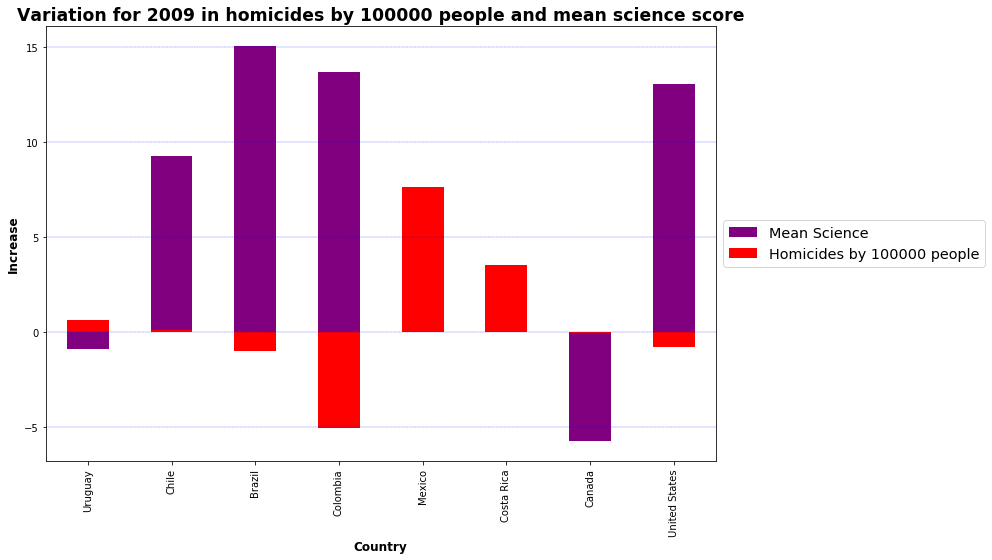

In [82]:
HomMeSci('2009')

In [83]:
def HomMeSciC(country):
    plt.figure();
    sciperfdif.loc[country,:].T.plot(kind='bar', label="Mean Science",color='purple')
    Intentional_homicides_wbPISAd.loc[country,:].T.plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation for '+country+' in homicides by 100000 people and mean science score',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.show()

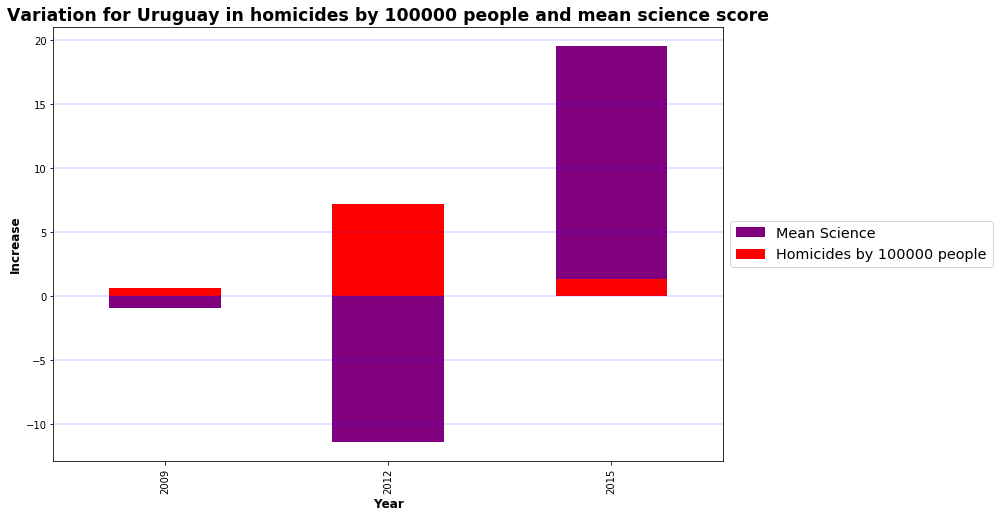

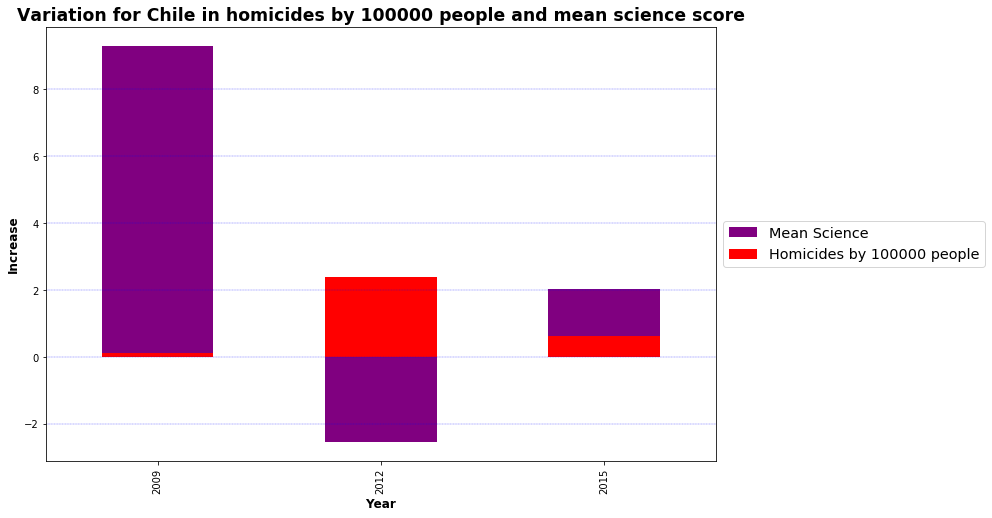

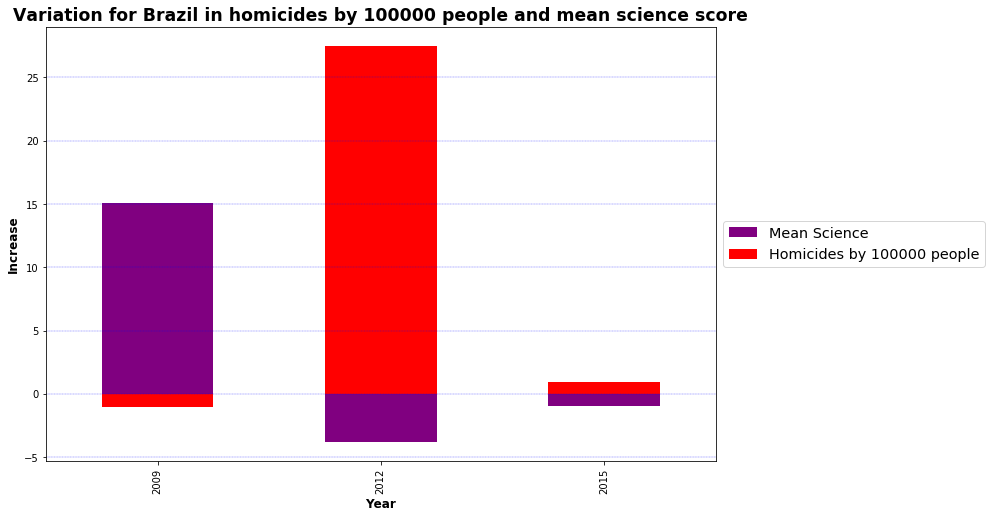

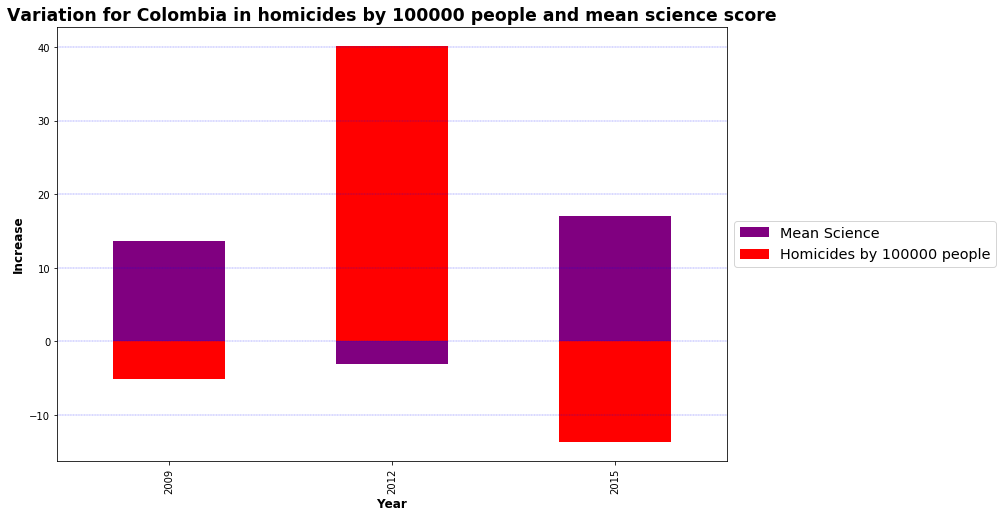

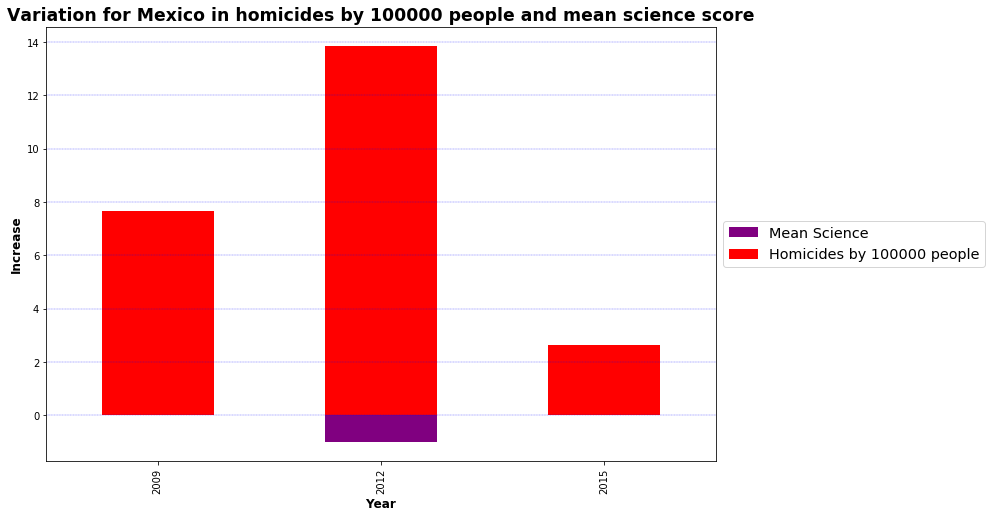

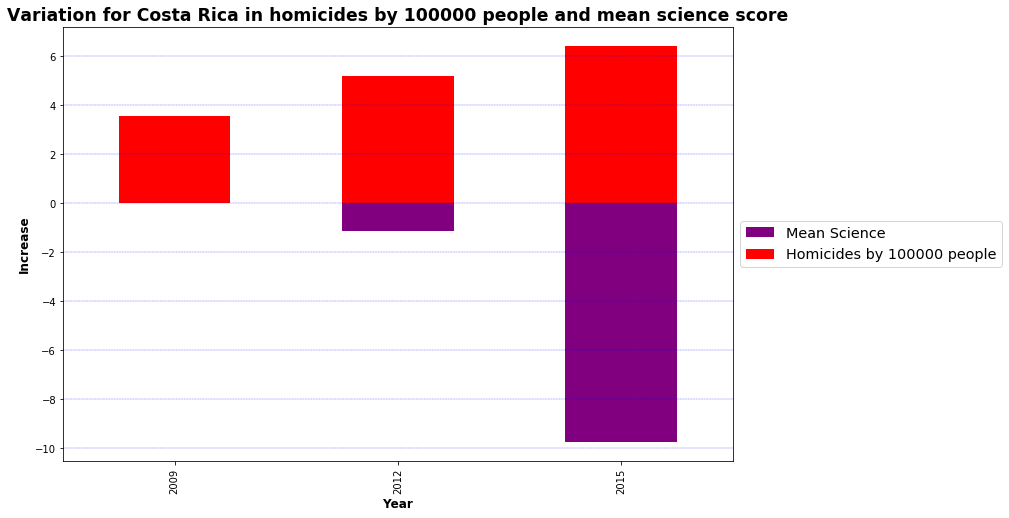

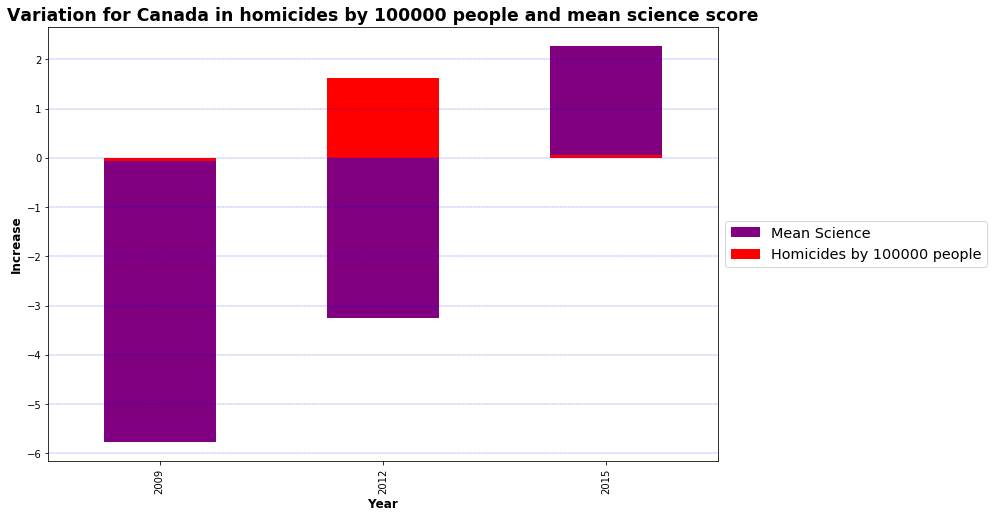

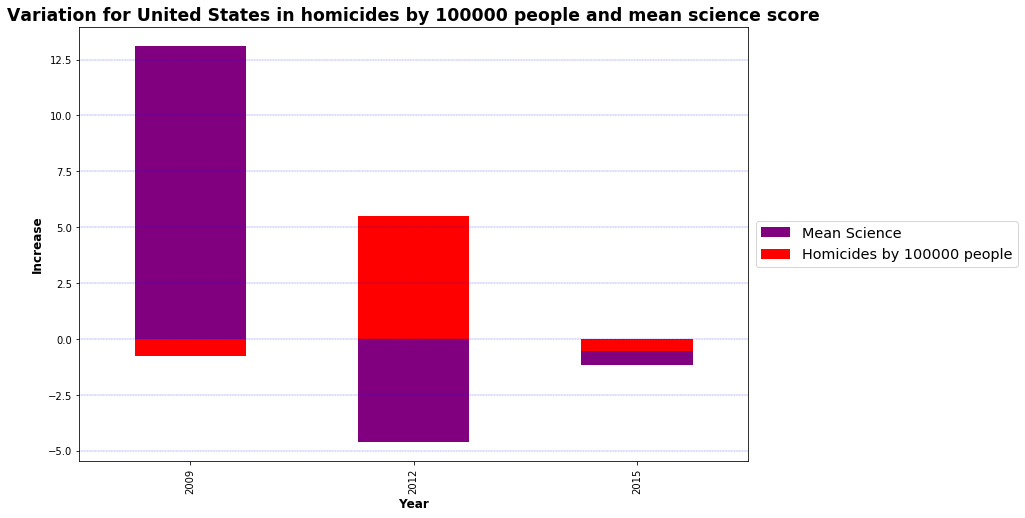

In [84]:
for country in sciperfdif.index.values:
    HomMeSciC(country)

# Importing Math science performance- PISA score

In [79]:
data7=pd.ExcelFile('Mean Math and reading scores 2006-2015.xls')
#print(data6.sheet_names)
df7=data7.parse('Report 1- Table',header=11)
df7=df7.reset_index()
df7=df7.loc[:303,'Year':'Average']
df7=df7.fillna(0)

for i in df7.index.values:
    if df7.iloc[i,0]==0:
        df7.iloc[i,0]=df7.iloc[i-1,0]

df7.rename(columns={'Jurisdiction':'Country Name','Average':'Average math'},inplace=True)
mathperf=df7.pivot(index='Country Name', columns='Year', values='Average math')
mathperf=mathperf.loc[['Uruguay','Chile', 'Brazil', 'Colombia', 'Mexico','Costa Rica','Canada', 'United States'],:]
mathperf=mathperf.replace('—',0)
mathperfdif=mathperf
mathperfdif=mathperfdif.astype(int)
mathperfdif
mathperf

Year,2006,2009,2012,2015
Country Name,,,,
Uruguay,426.799041,426.723773,409.291568,417.991883
Chile,411.350339,421.060473,422.632356,422.671358
Brazil,369.515046,385.814112,388.508963,377.069523
Colombia,369.978514,380.848215,376.488601,389.643828
Mexico,405.654640,418.509095,413.281467,408.023478
Costa Rica,0.000000,0.000000,406.999867,400.253373
Canada,527.007179,526.805153,518.070400,515.647428
United States,474.352158,487.396521,481.366786,469.628492


In [86]:
for i in Pisayears:
    for e in mathperfdif.index.values:
        mathperfdif.loc[e,i]=mathperf.loc[e,i]- mathperf.loc[e,str(int(i)-3)]
                    
mathperfdif=mathperfdif.replace(0,np.nan)
mathperfdif=mathperfdif.drop('2006',axis=1)
mathperfdif.loc['Costa Rica','2012']=np.nan
mathperfdif

Year,2009,2012,2015
Country Name,,,
Uruguay,-0.075268,-17.432205,8.700315
Chile,9.710135,1.571882,0.039002
Brazil,16.299065,2.694851,-11.439440
Colombia,10.869701,-4.359614,13.155227
Mexico,12.854455,-5.227628,-5.257989
Costa Rica,NaN,NaN,-6.746494
Canada,-0.202026,-8.734753,-2.422972
United States,13.044363,-6.029734,-11.738294


In [87]:
def HomMath(year):
    plt.figure();
    mathperfdif.loc[:,year].plot(kind='bar', label="Mean Math",color='turquoise')
    Intentional_homicides_wbPISAd.loc[:,year].plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation for '+year+' in homicides by 100000 people and mean math score',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Country',fontsize='large',fontweight="bold")
    plt.show()

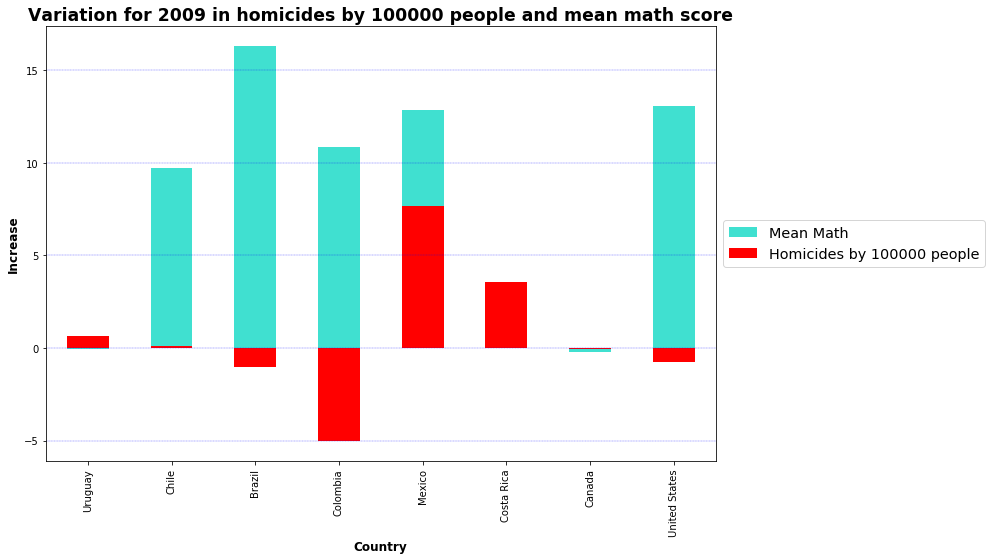

In [88]:
HomMath('2009')

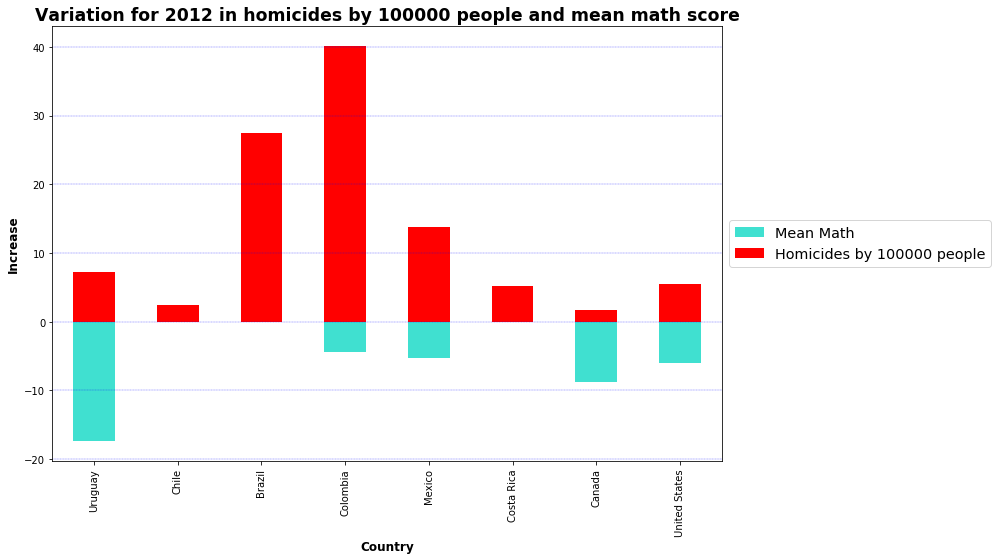

In [89]:
HomMath('2012')

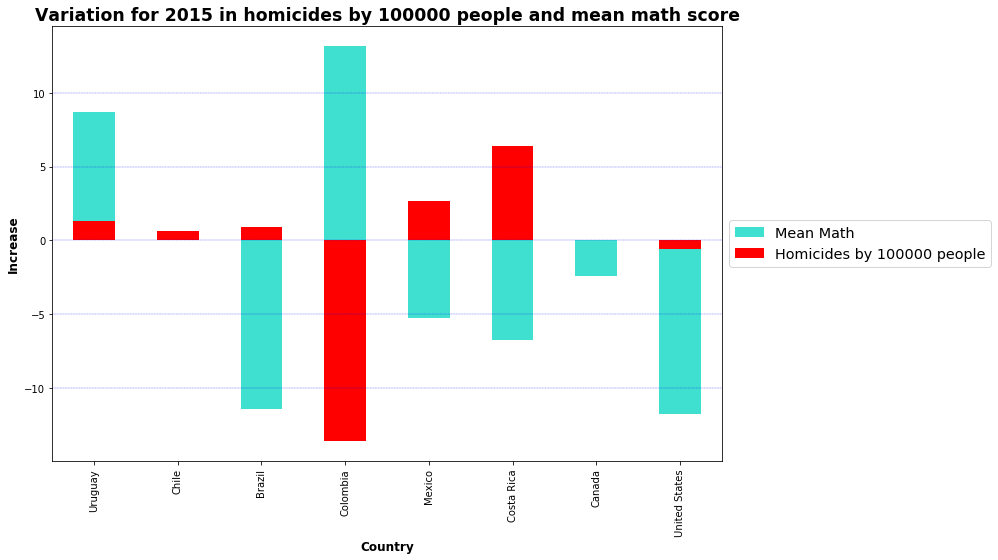

In [90]:
HomMath('2015')

In [91]:
def HomMathC(country):
    plt.figure();
    mathperfdif.loc[country,:].T.plot(kind='bar', label="Mean Math",color='turquoise')
    Intentional_homicides_wbPISAd.loc[country,:].T.plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation for '+country+' in homicides by 100000 people and mean math score',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.show()

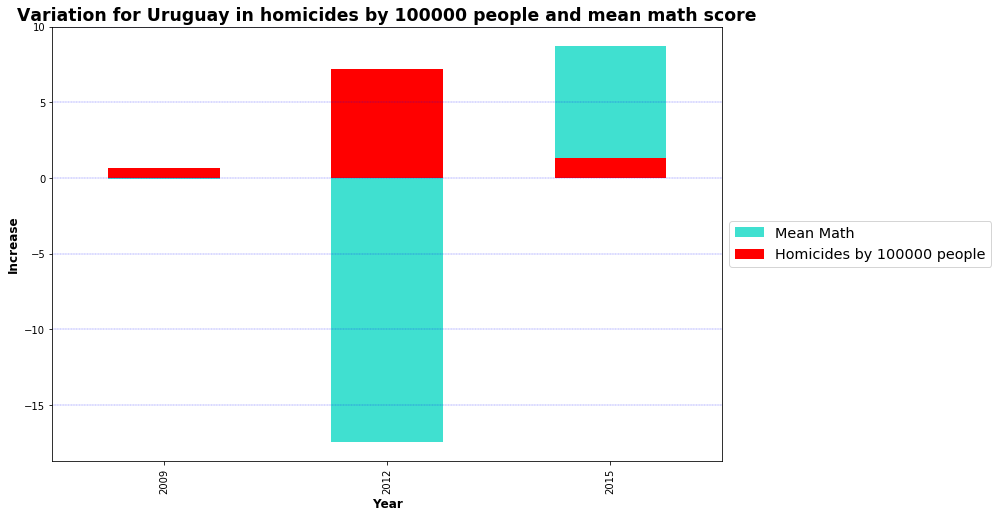

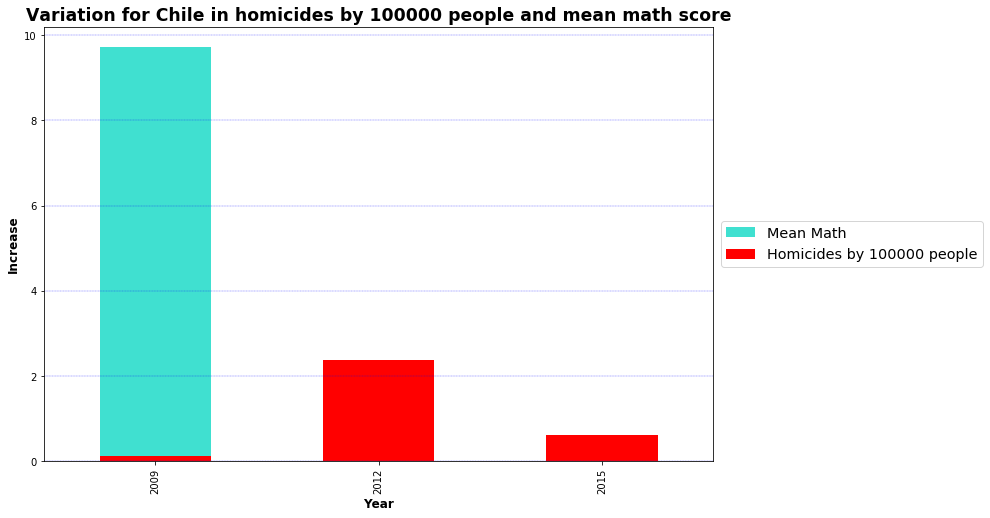

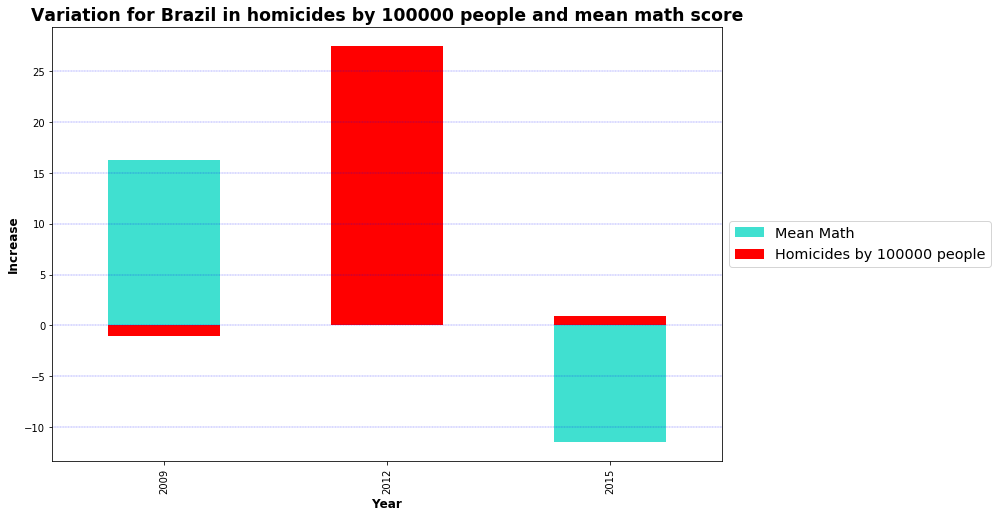

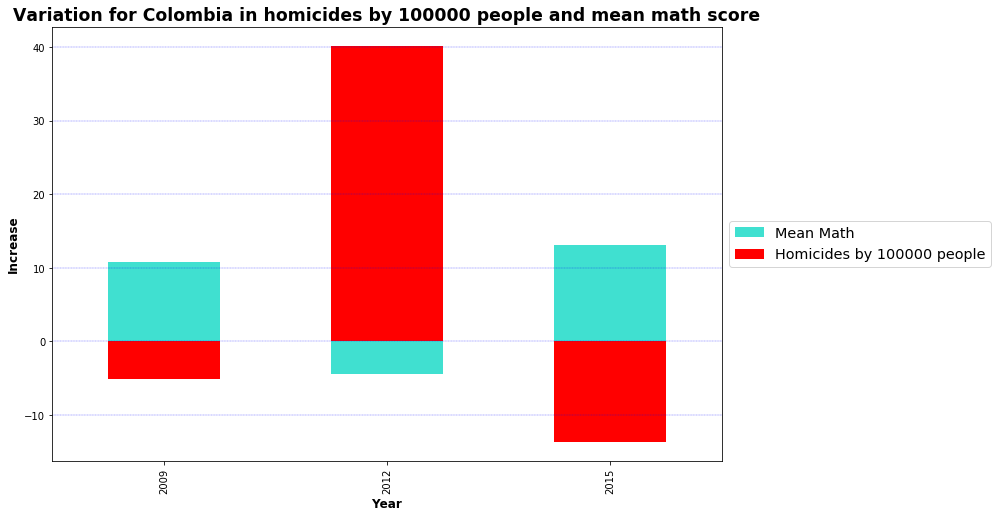

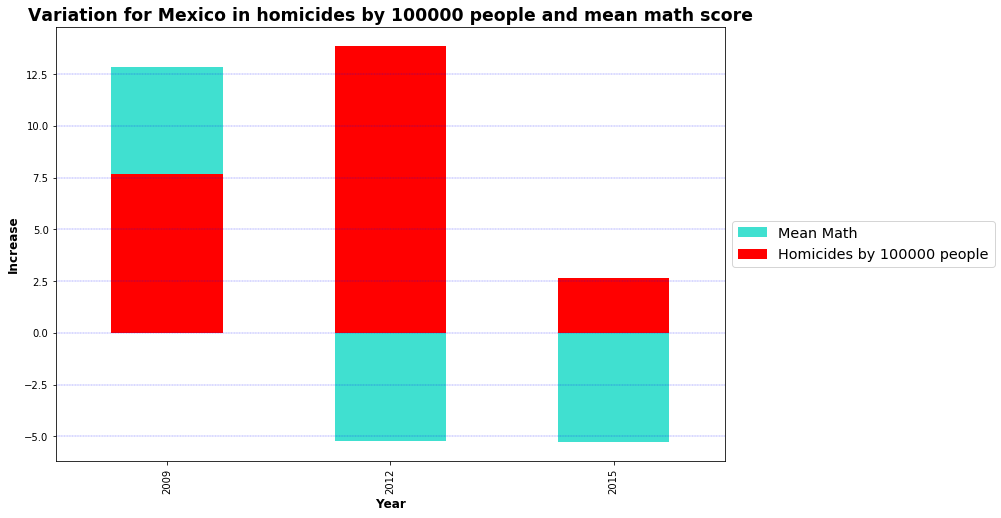

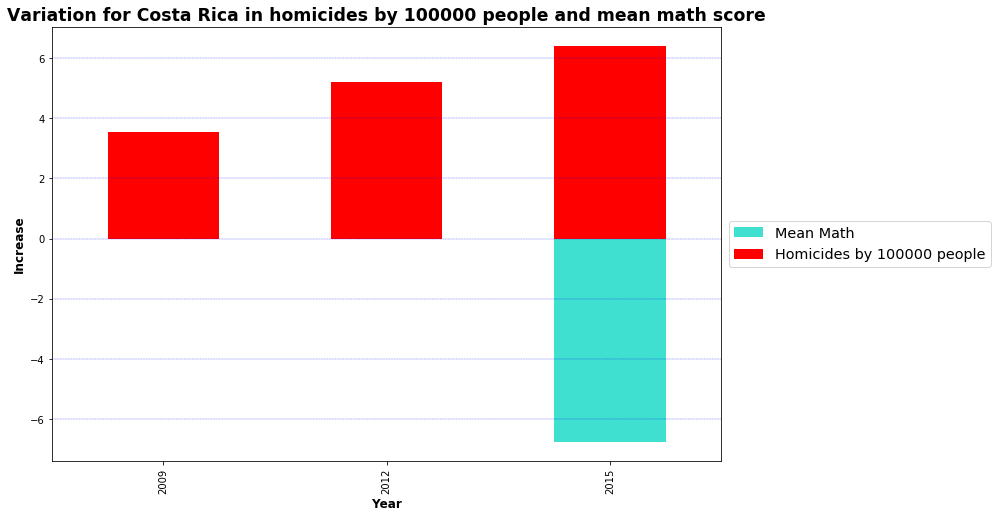

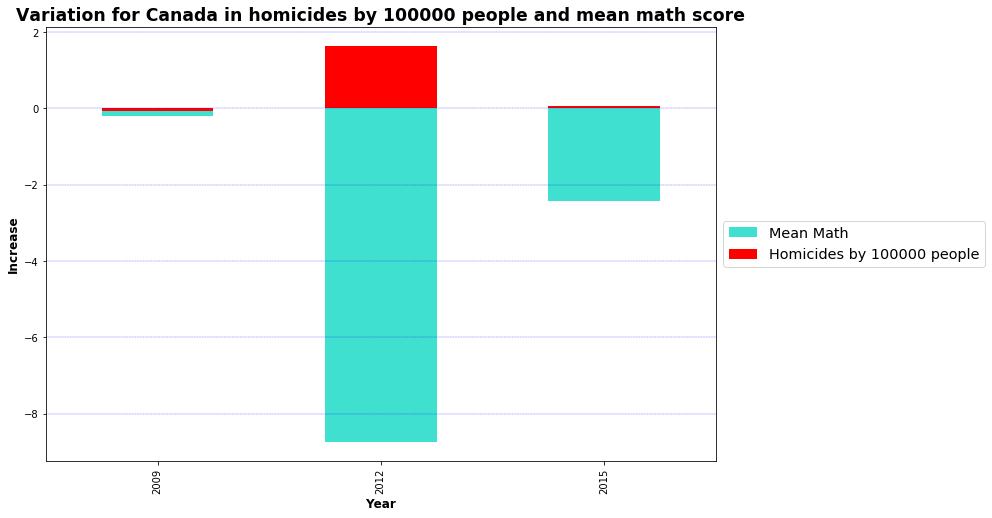

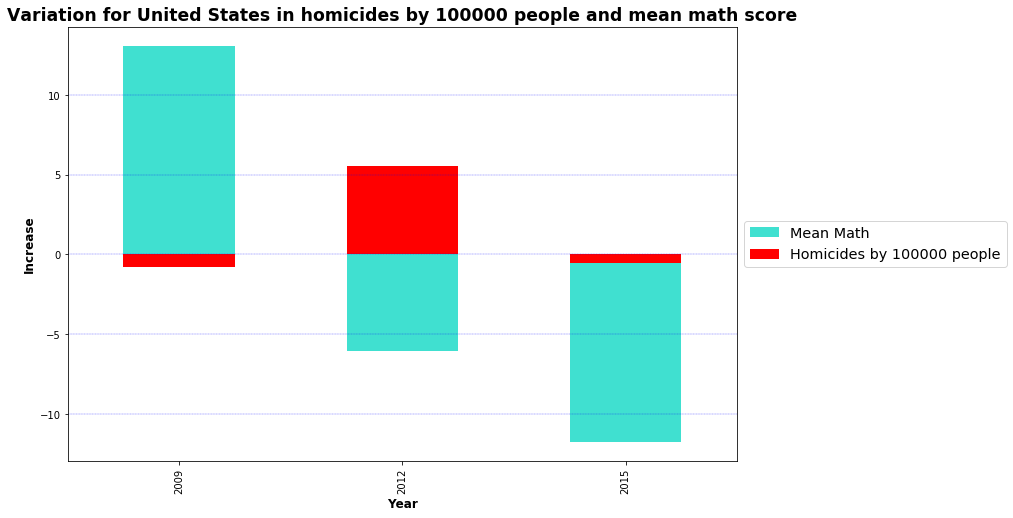

In [92]:
for country in mathperfdif.index.values:
    HomMathC(country)

# Importing Reading science performance- PISA score

In [80]:
df8=data7.parse('Report 5- Table',header=11)
df8=df8.reset_index()
df8=df8.loc[:303,'Year':'Average']
df8=df8.fillna(0)

for i in df8.index.values:
    if df8.iloc[i,0]==0:
        df8.iloc[i,0]=df8.iloc[i-1,0]

df8.rename(columns={'Jurisdiction':'Country Name','Average':'Average reading'},inplace=True)
readperf=df8.pivot(index='Country Name', columns='Year', values='Average reading')
readperf=readperf.loc[['Uruguay','Chile', 'Brazil', 'Colombia', 'Mexico','Costa Rica','Canada', 'United States'],:]
readperf=readperf.replace('—',0)
readperfdif=readperf
readperfdif=readperfdif.astype(int)
readperfdif
readperf

Year,2006,2009,2012,2015
Country Name,,,,
Uruguay,412.516733,425.813359,411.348919,436.572131
Chile,442.091346,449.369607,441.398164,458.570876
Brazil,392.885112,411.754927,406.533158,407.348592
Colombia,385.308038,413.181499,403.402534,424.905167
Mexico,410.496455,425.265299,423.553762,423.276479
Costa Rica,0.000000,0.000000,440.547811,427.487548
Canada,527.011296,524.241833,523.124003,526.667805
United States,0.000000,499.826821,497.581718,496.935097


In [94]:
for i in Pisayears:
    for e in readperfdif.index.values:
        readperfdif.loc[e,i]=readperf.loc[e,i]-readperf.loc[e,str(int(i)-3)]
                    
readperfdif=readperfdif.replace(0,np.nan)
readperfdif=readperfdif.drop('2006',axis=1)
readperfdif.loc['Costa Rica','2012']=np.nan
readperfdif.loc['United States','2009']=np.nan
readperfdif

Year,2009,2012,2015
Country Name,,,
Uruguay,13.296626,-14.464440,25.223212
Chile,7.278261,-7.971443,17.172712
Brazil,18.869815,-5.221770,0.815434
Colombia,27.873461,-9.778965,21.502633
Mexico,14.768844,-1.711537,-0.277283
Costa Rica,NaN,NaN,-13.060263
Canada,-2.769462,-1.117830,3.543802
United States,NaN,-2.245103,-0.646621


In [95]:
def HomRead(year):
    plt.figure();
    readperfdif.loc[:,year].plot(kind='bar', label="Mean Reading",color='blue')
    Intentional_homicides_wbPISAd.loc[:,year].plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation for '+year+' in homicides by 100000 people and mean reading score',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Country',fontsize='large',fontweight="bold")
    plt.show()

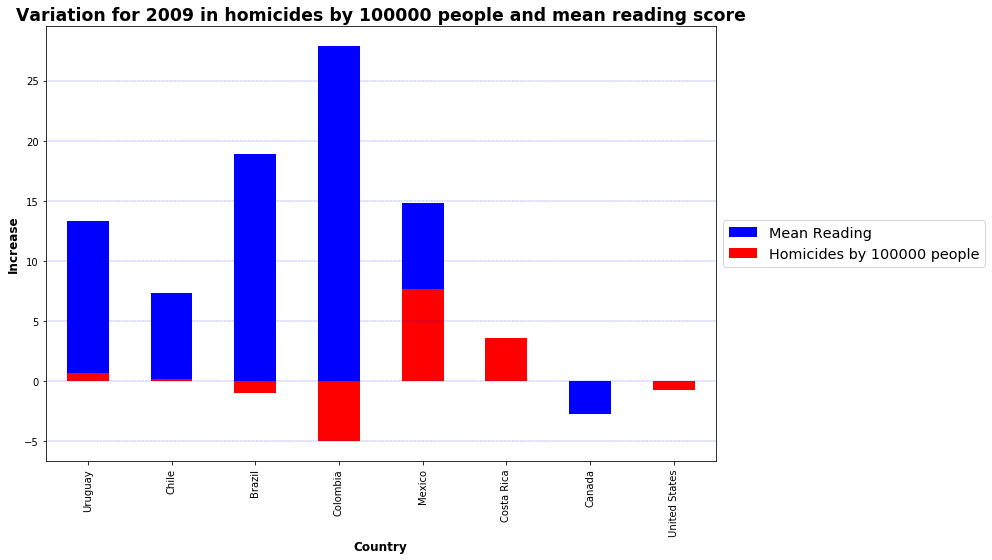

In [96]:
HomRead('2009')

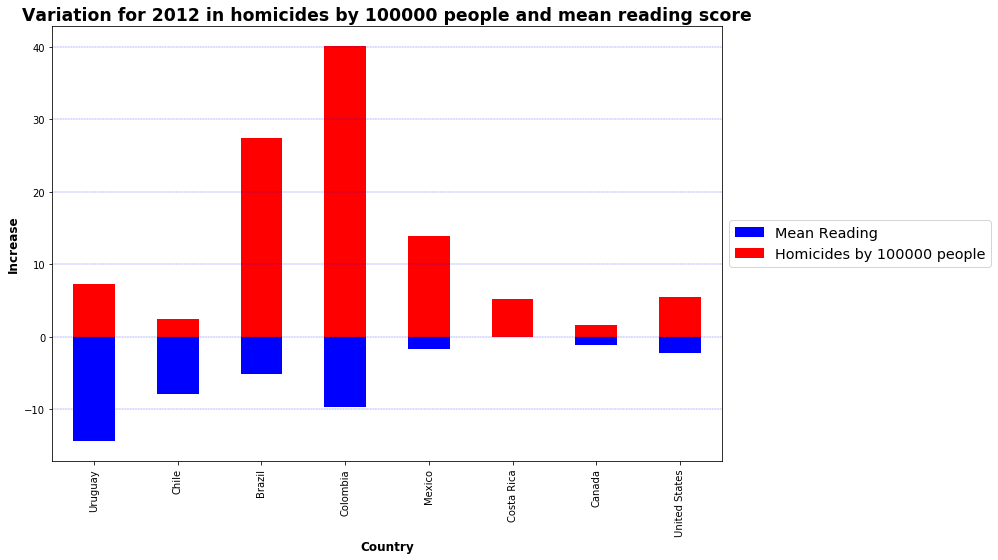

In [97]:
HomRead('2012')

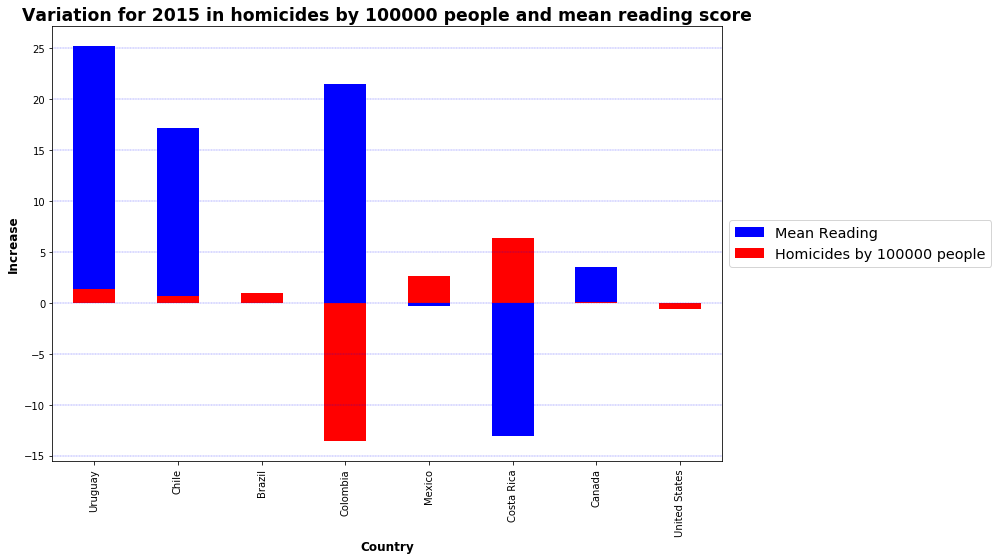

In [98]:
HomRead('2015')

In [99]:
def HomReadC(country):
    plt.figure();
    readperfdif.loc[country,:].T.plot(kind='bar', label="Mean Reading",color='blue')
    Intentional_homicides_wbPISAd.loc[country,:].T.plot(kind='bar',label='Homicides by 100000 people',color='red')
    plt.grid(axis='y',color='b', linestyle='--', linewidth=0.3)
    plt.title('Variation for '+country+' in homicides by 100000 people and mean reading score',fontsize='xx-large',fontweight="extra bold")
    plt.legend(loc=6,fontsize='x-large',bbox_to_anchor=(1,0.5))
    plt.ylabel('Increase',fontsize='large',fontweight="bold")
    plt.xlabel('Year',fontsize='large',fontweight="bold")
    plt.show()

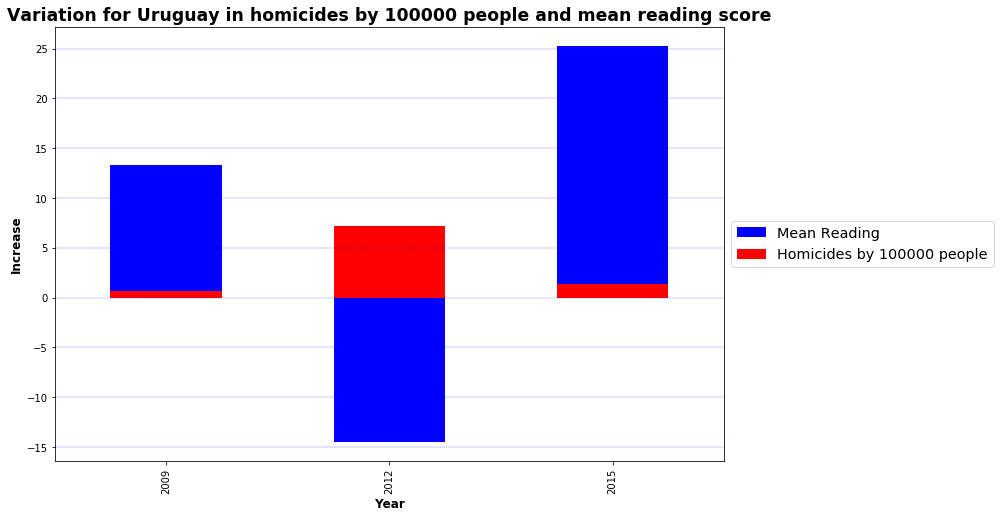

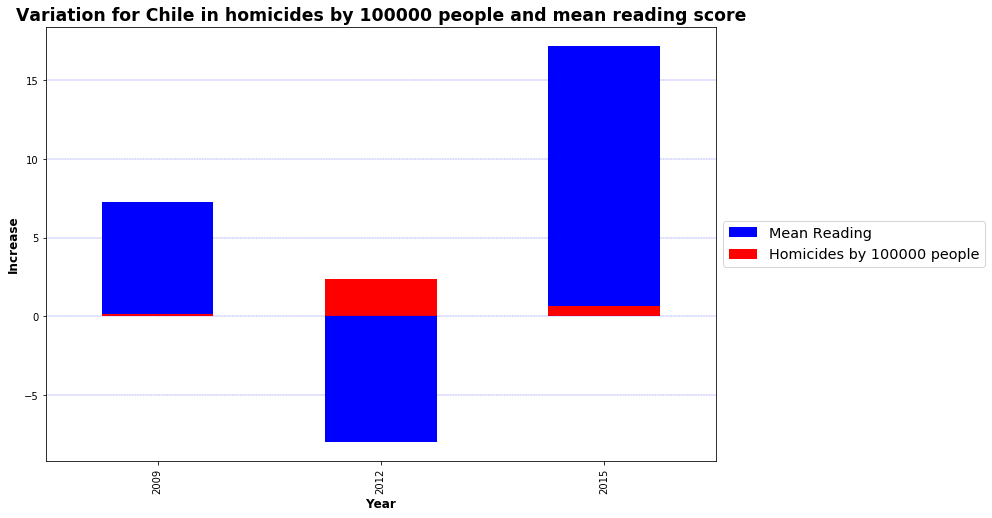

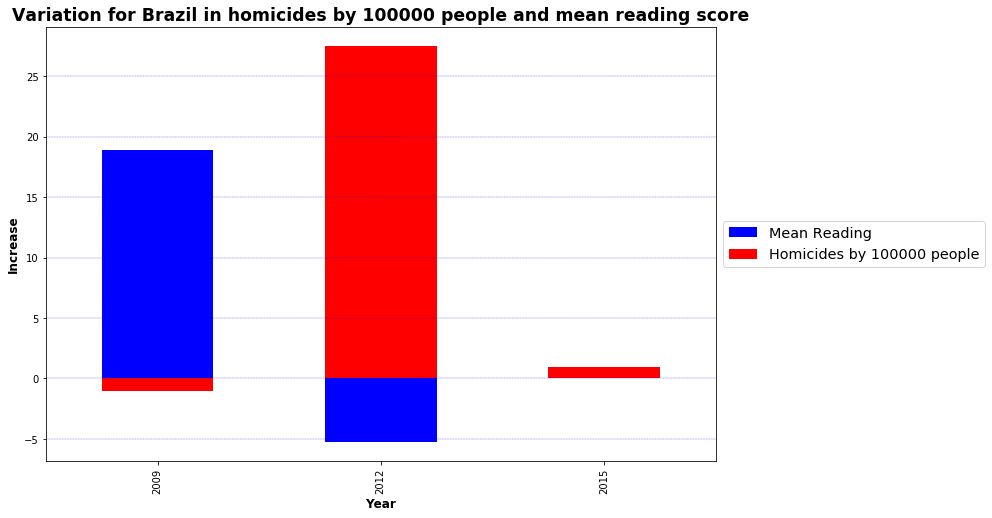

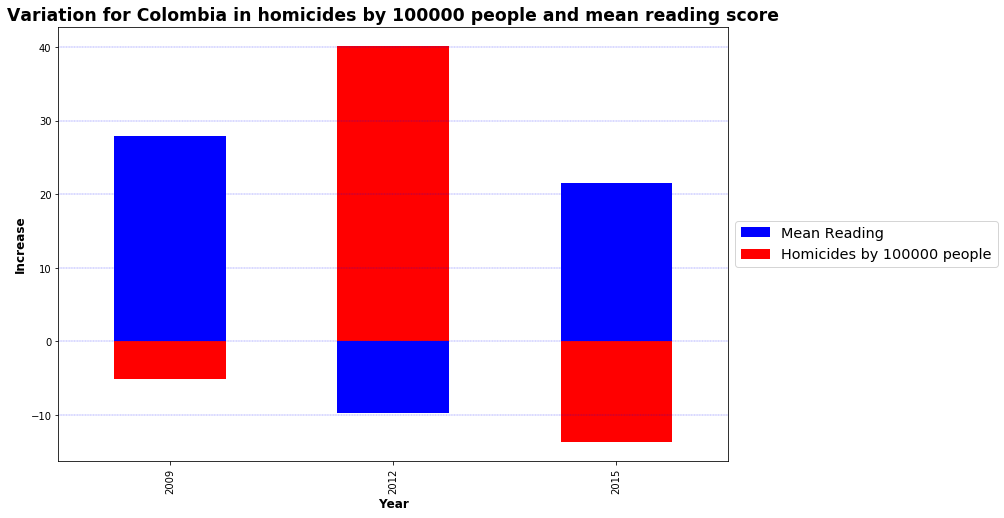

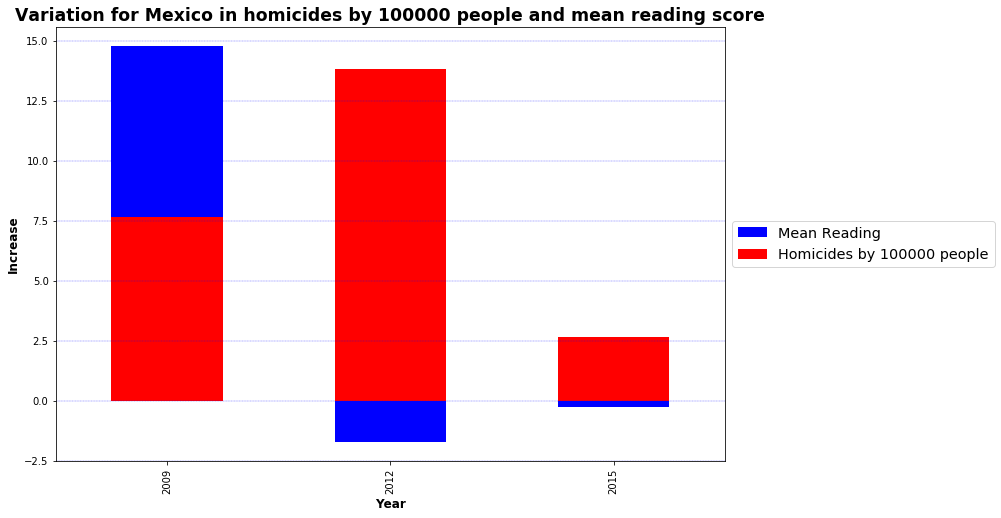

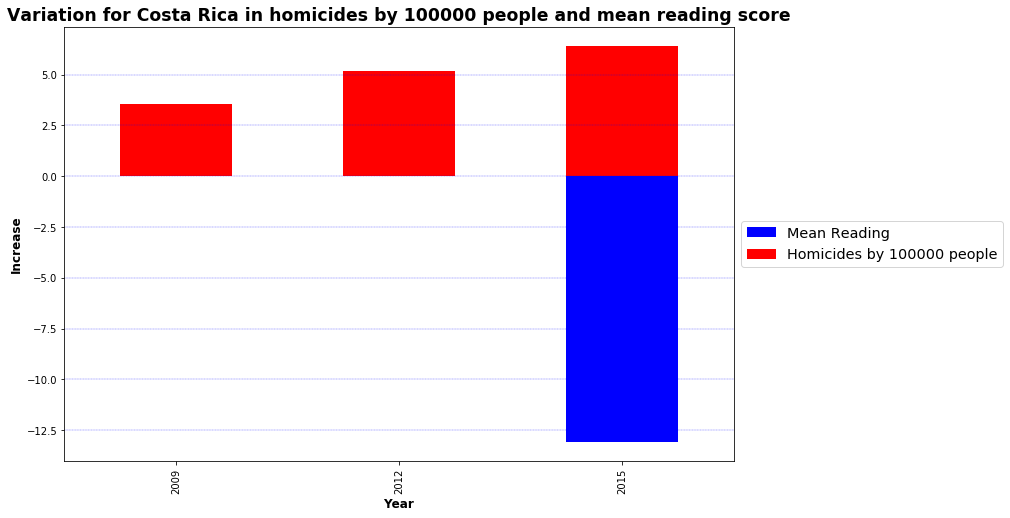

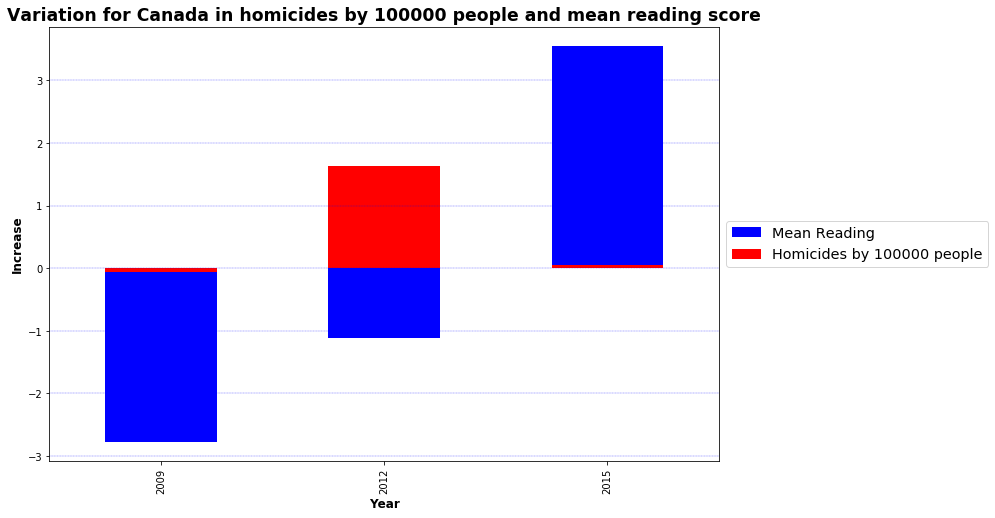

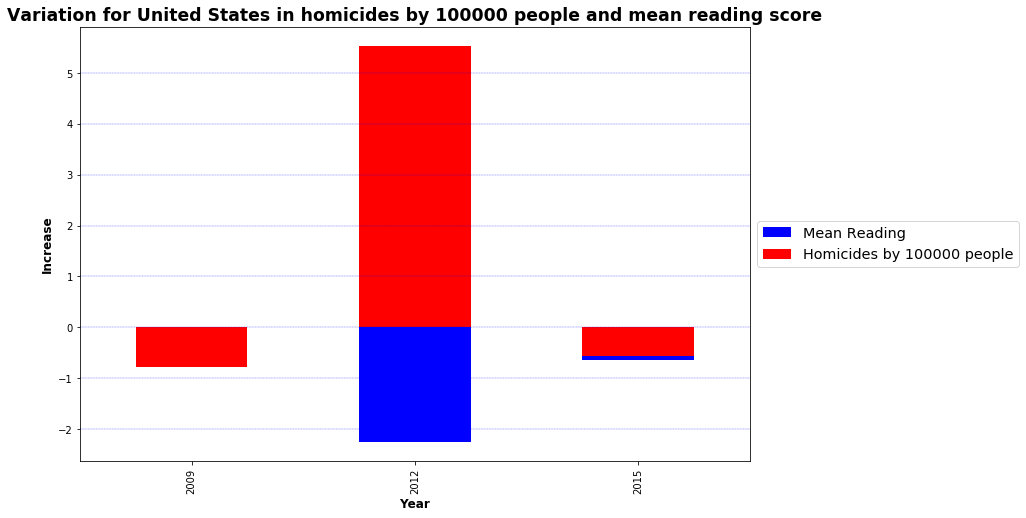

In [100]:
for country in readperfdif.index.values:
    HomReadC(country)

In [101]:
def countinghom(df):
    counting1=list()
    for i in Intentional_homicides_wbPISAd.columns.values:    
        for e in Intentional_homicides_wbPISAd.index.values:
            if Intentional_homicides_wbPISAd.loc[e,i]>0:
                if df.loc[e,i]<0:
                    counting1.append(e+i)
            elif Intentional_homicides_wbPISAd.loc[e,i]<0:
                if df.loc[e,i]>0:
                    counting1.append(e+i)
    x=len(counting1)
    
    counting2=list()
    for i in Intentional_homicides_wbPISAd.columns.values:    
        for e in Intentional_homicides_wbPISAd.index.values:
            if Intentional_homicides_wbPISAd.loc[e,i]!=0:
                if df.loc[e,i]!=0:
                    counting2.append(e+i)
    y=len(counting2)  
    
    percenthom=x*100/y
    return(percenthom)

In [102]:
def countinghomna(df):
    counting1=list()
    for i in Intentional_homicides_wbPISAd.columns.values:    
        for e in Intentional_homicides_wbPISAd.index.values:
            if Intentional_homicides_wbPISAd.loc[e,i]==0:
                    counting1.append(e+i)
            elif Intentional_homicides_wbPISAd.loc[e,i]!=0:
                if df.loc[e,i]==0:
                    counting1.append(e+i)
    x=len(counting1)
   
    counting2=list()
    for i in Intentional_homicides_wbPISAd.columns.values:    
        for e in Intentional_homicides_wbPISAd.index.values:
            if Intentional_homicides_wbPISAd.loc[e,i]!=0:
                if df.loc[e,i]!=0:
                    counting2.append(e+i)
    y=len(counting2)  
    
    percenthom=x*100/(y+x)
    return(percenthom)

In [103]:
countinghom(readperfdif)

50.0

In [104]:
countinghom(mathperfdif)

58.333333333333336

In [105]:
countinghom(sciperfdif)

65.21739130434783

In [106]:
countinghomna(readperfdif)

0.0

In [107]:
countinghomna(mathperfdif)

0.0

In [108]:
countinghomna(sciperfdif)

4.166666666666667

# Let's use Plotly

In [109]:
!pip install plotly

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [110]:
import plotly.plotly as py
from plotly.graph_objs import *

In [111]:
py.sign_in('dschloeter', 'cdgeUotg8vw37UC487Cm')
#print(plotly.__version__)
#plotly.offline.init_notebook_mode() #run at start

In [112]:
Intentional_homicides_wb.to_csv('Intentional_homicides', sep='\t')
enrollment_primary.to_csv('Enrollment_primary',sep='\t')
enrollment_secundary.to_csv('Enrollment_secundary',sep='\t')
Intentional_homicides_wb_dif.to_csv('Intentional_homicides_dif', sep='\t')
enrollment_primary_dif.to_csv('Enrollment_primary_dif',sep='\t')
Dif_total.to_csv('Dif_total',sep='\t')

In [115]:

trace1 = {
  "x": ["Chile", "Bolivia", "Uruguay", "Brazil", "Colombia", "Venezuela, RB", "Argentina", "Peru"], 
  "y": ["", "", "0.3893324438418704", "0.5642389809591997", "0.3623222009727982", "5.943484126543904"], 
  "name": "Intentional homicide&nbsp; by 100 000 people", 
  "orientation": "v", 
  "type": "bar", 
  "xsrc": "dschloeter:32:2ee08e", 
  "ysrc": "dschloeter:32:592fa8"
}

trace2 = {
  "x": ["Chile", "Bolivia", "Uruguay", "Brazil", "Colombia", "Venezuela, RB", "Argentina", "Peru"], 
  "y": ["", "0.7033081054679968", "1.8573760986329972", "-3.957763671875", "2.0051422119140057", "2.500595092773011", "0.6943283081059946", "-0.4351806640620026"], 
  "hoverinfo": "x+y+name", 
  "name": "Primary enrollment % Gross enrollment", 
  "orientation": "v", 
  "text": ["", "0.7033081054679968", "1.8573760986329972", "-3.957763671875", "2.0051422119140057", "2.500595092773011", "0.6943283081059946", "-0.4351806640620026"], 
  "textsrc": "dschloeter:33:ba0e5f", 
  "type": "bar", 
  "xsrc": "dschloeter:33:50004c", 
  "ysrc": "dschloeter:33:ba0e5f"
}

data = Data([trace1, trace2])
layout = {
  "autosize": True, 
  "title": "South America - Variation from 2001-2002", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 7.5], 
    "title": "Country", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-4.50783299401, 6.49355344868], 
    "title": "Variation", 
    "type": "linear"
  }
}

fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

C:\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [116]:
Intentional_homicides_wb.to_csv('Intentional_homicides', sep='\t')
edquality.to_csv('edquality',sep='\t')

In [117]:

trace1 = {
  "z": ["3.62216030863985", "8.91863112456459", "7.83729769975312", "27.9565761326428", "27.9189505521133", "61.9095776621655", "7.50787867761292", "6.70253534699536", "8.72963521598032", "10.0261162461969", "62.4244868288472", "66.8731473947284", "31.387455530513", "14.5492325023707", "16.1083096659518", "1.46328880816053", "4.45803047732347"], 
  "autocolorscale": False, 
  "colorbar": {
    "x": 0.990873786408, 
    "y": 0.5, 
    "title": "Intentional homicides by 100000 people"
  }, 
  "colorscale": [
    [0, "rgb(220,220,220)"], [0.2, "rgb(245,195,157)"], [0.4, "rgb(245,160,105)"], [1, "rgb(178,10,28)], 
  "locationmode": "country names", 
  "locations": ["Chile", "Bolivia", "Uruguay", "Brazil", "Colombia", "Venezuela, RB", "Argentina", "Peru", "Nicaragua", "Costa Rica", "El Salvador", "Honduras", "Guatemala", "Panama", "Mexico", "Canada", "United States"], 
  "locationssrc": "dschloeter:52:7c14bc", 
  "name": "Intentional homicides", 
  "type": "choropleth", 
  "zauto": True, 
  "zmax": 66.8731473947, 
  "zmin": 1.46328880816, 
  "zsrc": "dschloeter:52:e0b70e"
}
trace2 = {
  "hoverinfo": "location+text+name", 
  "locationmode": "country names", 
  "locations": ["Chile", "Bolivia", "Uruguay", "Brazil", "Colombia", "Venezuela, RB", "Argentina", "Peru", "Nicaragua", "Costa Rica", "El Salvador", "Honduras", "Guatemala", "Panama", "Mexico", "Canada", "United States"], 
  "locationssrc": "dschloeter:51:4d0c07", 
  "marker": {
    "autocolorscale": False, 
    "cauto": True, 
    "cmax": 5.245896786, 
    "cmin": 2.538634422, 
    "color": ["3.69163698", "3.3487562410000002", "2.90350456", "2.720419415", "3.40590798", "2.640229222", "2.983357393", "2.538634422", "2.655974621", "4.666448712", "3.804579237", "3.1801575860000004", "2.6933680339999997", "3.5230981710000004", "2.8140589030000003", "5.245896786", "4.564571285"], 
    "colorscale": [
      [0, "#f7fcf5"], [0.125, "#e5f5e0"], [0.25, "#c7e9c0"], [0.375, "#a1d99b"], [0.5, "#74c476"], [0.625, "#41ab5d"], [0.75, "#238b45"], [0.875, "#006d2c"], [1, "#00441b], 
    "colorsrc": "dschloeter:51:57ce74", 
    "line": {"width": 0}, 
    "size": ["3.69163698", "3.3487562410000002", "2.90350456", "2.720419415", "3.40590798", "2.640229222", "2.983357393", "2.538634422", "2.655974621", "4.666448712", "3.804579237", "3.1801575860000004", "2.6933680339999997", "3.5230981710000004", "2.8140589030000003", "5.245896786", "4.564571285"], 
    "sizemode": "area", 
    "sizeref": 0.247130225328, 
    "sizesrc": "dschloeter:51:57ce74"
  }, 
  "mode": "markers", 
  "name": "Quality of system of education 1-7", 
  "text": ["3.69163698", "3.3487562410000002", "2.90350456", "2.720419415", "3.40590798", "2.640229222", "2.983357393", "2.538634422", "2.655974621", "4.666448712", "3.804579237", "3.1801575860000004", "2.6933680339999997", "3.5230981710000004", "2.8140589030000003", "5.245896786", "4.564571285"], 
  "textsrc": "dschloeter:51:57ce74", 
  "type": "scattergeo"
}
data = Data([trace1, trace2])
layout = {
  "autosize": True, 
  "geo": {
    "center": {
      "lat": 46.7603736642, 
      "lon": -137.590665456
    }, 
    "projection": {
      "rotation": {"lon": -137.590665456}, 
      "scale": 0.791137301185
    }
  }, 
  "title": "Intentional homicides and quality of education in America 2014", 
  "xaxis": {
    "autorange": True, 
    "range": [-1, 6]
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-1, 4]
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

SyntaxError: EOL while scanning string literal (<ipython-input-117-013a89544249>, line 11)

In [ ]:
# This code was retrieved from plotly and although it generates an error when opened through this markdown, in plotly the map looks good. 
# Here is the information given by plotly to access the plot.


# Get this figure: fig = py.get_figure("https://plot.ly/~dschloeter/53/")
# Get this figure's data: data = py.get_figure("https://plot.ly/~dschloeter/53/").get_data()
# Add data to this figure: py.plot(Data([Scatter(x=[1, 2], y=[2, 3])]), filename ="2014 america", fileopt="extend")
# Get z data of first trace: z1 = py.get_figure("https://plot.ly/~dschloeter/53/").get_data()[0]["z"]

# Get figure documentation: https://plot.ly/python/get-requests/
# Add data documentation: https://plot.ly/python/file-options/

# If you're using unicode in your file, you may need to specify the encoding.
# You can reproduce this figure in Python with the following code!

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api
